<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/train_ddpg_multi_stock_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [2]:
!pip uninstall -y dask cudf-cu12 cuml-cu12 rapids-dask-dependency pylibraft-cu12 pylibcudf-cu12 numba stable-baselines3 gymnasium gym-anytrading

Found existing installation: dask 2024.12.1
Uninstalling dask-2024.12.1:
  Successfully uninstalled dask-2024.12.1
Found existing installation: cudf-cu12 25.2.1
Uninstalling cudf-cu12-25.2.1:
  Successfully uninstalled cudf-cu12-25.2.1
Found existing installation: cuml-cu12 25.2.1
Uninstalling cuml-cu12-25.2.1:
  Successfully uninstalled cuml-cu12-25.2.1
Found existing installation: rapids-dask-dependency 25.2.0
Uninstalling rapids-dask-dependency-25.2.0:
  Successfully uninstalled rapids-dask-dependency-25.2.0
Found existing installation: pylibraft-cu12 25.2.0
Uninstalling pylibraft-cu12-25.2.0:
  Successfully uninstalled pylibraft-cu12-25.2.0
Found existing installation: pylibcudf-cu12 25.2.1
Uninstalling pylibcudf-cu12-25.2.1:
  Successfully uninstalled pylibcudf-cu12-25.2.1
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: stable_baselines3 2.6.0
Uninstalling stable_baselines3-2.6.0:
  Successfu

In [3]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 \
    stable-baselines3[extra] \
    gymnasium==0.29.1 \
    gym-anytrading==2.0.0


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached gym_anytrading-2.0.0-py3-none-any.whl.metadata (292 bytes)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 

In [1]:
import cudf, cuml, dask, stable_baselines3, gymnasium
import numba, pandas, numpy, scipy

print("cuDF Version:", cudf.__version__)
print("cuML Version:", cuml.__version__)
print("Dask Version:", dask.__version__)
print("Stable Baselines3 Installed:", stable_baselines3.__version__)
print("Gymnasium Version:", gymnasium.__version__)
print("NumPy Version:", numpy.__version__)
print("SciPy Version:", scipy.__version__)
print("Pandas Version:", pandas.__version__)

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

[I] [16:24:47.473278] Import of umap.umap_.nearest_neighbors failed with: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cuml/internals/safe_imports.py", line 312, in safe_import_from
    imported_module = importlib.import_module(module)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1126, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>"

In [2]:
!nvidia-smi

Tue May 27 16:24:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TF Version: 2.18.0
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
#Step 2: Set Environment Paths for CUDA 11.8
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [5]:
try:
    df = cudf.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
    print("cuDF is working and using GPU!")
except Exception as e:
    print(f"cuDF GPU check failed: {e}")



cuDF is working and using GPU!


In [6]:
import os
import time
import gc
import numpy as np
import pandas as pd
import xgboost as xgb
import yfinance as yf
import gymnasium as gym  #Use gymnasium instead of gym
import gym_anytrading
from gymnasium.envs.registration import registry, register
import matplotlib.pyplot as plt

#Prevent cuDF from taking all GPU memory
os.environ["RAPIDS_NO_INITIALIZE"] = "1"

#RAPIDS & GPU-based Libraries (Try-Except to Avoid CPU Errors)
try:
    import cudf
    import cuml
    from cuml.ensemble import RandomForestClassifier
    from cuml.metrics import accuracy_score
    GPU_AVAILABLE = True
    print("cuDF & cuML are available and running on GPU.")
except ImportError:
    print("cuDF/cuML not available. Switching to CPU mode.")
    GPU_AVAILABLE = False

#Reinforcement Learning & Trading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#TensorFlow & GPU Optimization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Ensure TensorFlow GPU Memory Allocation is Configured
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  #Prevents full allocation
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory issue: {e}")

#Google Drive Access (for Colab)
from google.colab import drive


cuDF & cuML are available and running on GPU.
TensorFlow GPU memory growth enabled


In [9]:
# ✅ DDPG Date-Based Walkforward Script for Multistock (with Model Selector Metrics)

# === Mount Google Drive (Optional) ===
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
RESULTS_DIR = "/content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward"
os.makedirs(RESULTS_DIR + "/data", exist_ok=True)

# === Imports ===
import gc
import torch
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from stable_baselines3 import DDPG
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise
from gymnasium.spaces import Box
from gym_anytrading.envs import StocksEnv

# === Date Ranges ===
train_start = pd.to_datetime("2023-06-01").tz_localize("UTC")
train_end = pd.to_datetime("2024-06-01").tz_localize("UTC")
test_start = pd.to_datetime("2024-06-01").tz_localize("UTC")
test_end = pd.to_datetime("2025-04-28").tz_localize("UTC")

TICKERS = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

# === Helper Functions ===
def clean_stock_data(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df.rename(columns=lambda x: x.capitalize(), inplace=True)
    df.rename(columns={'Adj Close': 'Close'}, inplace=True)
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
    df.dropna(subset=['Datetime', 'Close'], inplace=True)
    df['Datetime'] = df['Datetime'].dt.tz_convert("UTC")
    df.sort_values(by='Datetime', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

def compute_technical_indicators(df):
    df['ATR'] = (df['High'] - df['Low']).rolling(window=14).mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    macd_fast = df['Close'].ewm(span=12).mean()
    macd_slow = df['Close'].ewm(span=26).mean()
    df['MACD_Line'] = macd_fast - macd_slow
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.clip(lower=0).rolling(window=14).mean()
    loss = -delta.clip(upper=0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['Volume_Avg'] = df['Volume'].rolling(window=20).mean()
    df['ADX'] = abs(df['High'] - df['Low']).rolling(window=14).mean()
    df.dropna(inplace=True)
    return df

class ContinuousTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

    def step(self, action):
        if isinstance(action, np.ndarray):
            action = action[0]
        if action < -0.3:
            discrete_action = 0
        elif action > 0.3:
            discrete_action = 1
        else:
            discrete_action = 2
        return super().step(discrete_action)

# === Training Loop ===
window_size = 10
initial_balance = 100000
results = []

for symbol in TICKERS:
    print(f"\nProcessing {symbol}")
    try:
        df = yf.download(symbol, period="720d", interval="1h", progress=False)
        if df.empty:
            print(f"No data for {symbol}")
            continue

        df.reset_index(inplace=True)
        df = clean_stock_data(df)
        df = compute_technical_indicators(df)

        df_train = df[(df['Datetime'] >= train_start) & (df['Datetime'] < train_end)].copy()
        df_test = df[(df['Datetime'] >= test_start) & (df['Datetime'] <= test_end)].copy()

        if len(df_train) < 300 or len(df_test) < 100:
            print(f"Skipping {symbol}: insufficient data.")
            continue

        env_train = DummyVecEnv([lambda: ContinuousTradingEnv(df_train, (50, len(df_train)), window_size)])
        env_test = DummyVecEnv([lambda: ContinuousTradingEnv(df_test, (50, len(df_test)), window_size)])

        n_actions = env_train.action_space.shape[-1]
        action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

        model = DDPG(
            "MlpPolicy", env_train,
            learning_rate=0.0003,
            buffer_size=50000,
            batch_size=64,
            tau=0.005,
            gamma=0.99,
            train_freq=(1, "step"),
            action_noise=action_noise,
            verbose=0,
            device='cuda' if torch.cuda.is_available() else 'cpu'
        )

        model.learn(total_timesteps=10000)

        obs = env_test.reset()
        portfolio, trade_log, buy_price = [], [], None
        balance, position = initial_balance, 0
        wins, total_trades = 0, 0
        prices = df_test['Close'].values

        for i in range(len(df_test) - 50):
            action, _ = model.predict(obs)
            obs, _, done, _ = env_test.step([action])[:4]
            price = prices[i + 50]

            if action > 0.3 and buy_price is None:
                buy_price = price
                position = balance / price
                balance = 0
                trade_log.append("BUY")
            elif action < -0.3 and buy_price is not None:
                balance = position * price
                if balance - initial_balance > 0:
                    wins += 1
                total_trades += 1
                position = 0
                buy_price = None
                trade_log.append("SELL")
            else:
                trade_log.append("HOLD")

            value = balance if balance > 0 else position * price
            portfolio.append(value)
            if done[0]:
                break

        final_value = portfolio[-1]
        daily_returns = pd.Series(portfolio).pct_change().fillna(0)
        sharpe = (daily_returns.mean() / (daily_returns.std() + 1e-6)) * np.sqrt(252)
        drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100
        return_pct = ((final_value / initial_balance) - 1) * 100
        accuracy = wins / total_trades if total_trades > 0 else 0

        results.append({
            "Ticker": symbol,
            "Sharpe": round(sharpe, 4),
            "Accuracy": round(accuracy, 4),
            "Drawdown": round(drawdown, 2),
            "Return": round(return_pct, 2),
            "Final_Portfolio": round(final_value, 2)
        })

        df_out = pd.DataFrame({"Date": df_test['Datetime'].iloc[50:50+len(portfolio)], "Portfolio Value": portfolio})
        df_out.to_csv(f"{RESULTS_DIR}/data/{symbol}_portfolio.csv", index=False)

        del model, env_train, env_test
        gc.collect()
        torch.cuda.empty_cache()

    except Exception as e:
        print(f"Error with {symbol}: {e}")

# === Save Results ===
summary_df = pd.DataFrame(results)
summary_df.to_csv(os.path.join(RESULTS_DIR, "ddpg_datebased_walkforward_summary.csv"), index=False)
print("\nDDPG walkforward results saved.")


Mounted at /content/drive

Processing AAPL

Processing TSLA

Processing MSFT

Processing GOOGL

Processing AMZN

Processing NVDA

Processing META

Processing BRK-B

Processing JPM

Processing JNJ

Processing XOM

Processing V

Processing PG

Processing UNH

Processing MA

Processing HD

Processing LLY

Processing MRK

Processing PEP

Processing KO

Processing BAC

Processing ABBV

Processing AVGO

Processing PFE

Processing COST

Processing CSCO

Processing TMO

Processing ABT

Processing ACN

Processing WMT

Processing MCD

Processing ADBE

Processing DHR

Processing CRM

Processing NKE

Processing INTC

Processing QCOM

Processing NEE

Processing AMD

Processing TXN

Processing AMGN

Processing UPS

Processing LIN

Processing PM

Processing UNP

Processing BMY

Processing LOW

Processing RTX

Processing CVX

Processing IBM

Processing GE

Processing SBUX

Processing ORCL

DDPG walkforward results saved.


✅ Saved model selector file to: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/model_selector_ready_ddpg.csv

📈 Top 5 Tickers:
✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/IBM_ddpg_portfolio_top.png


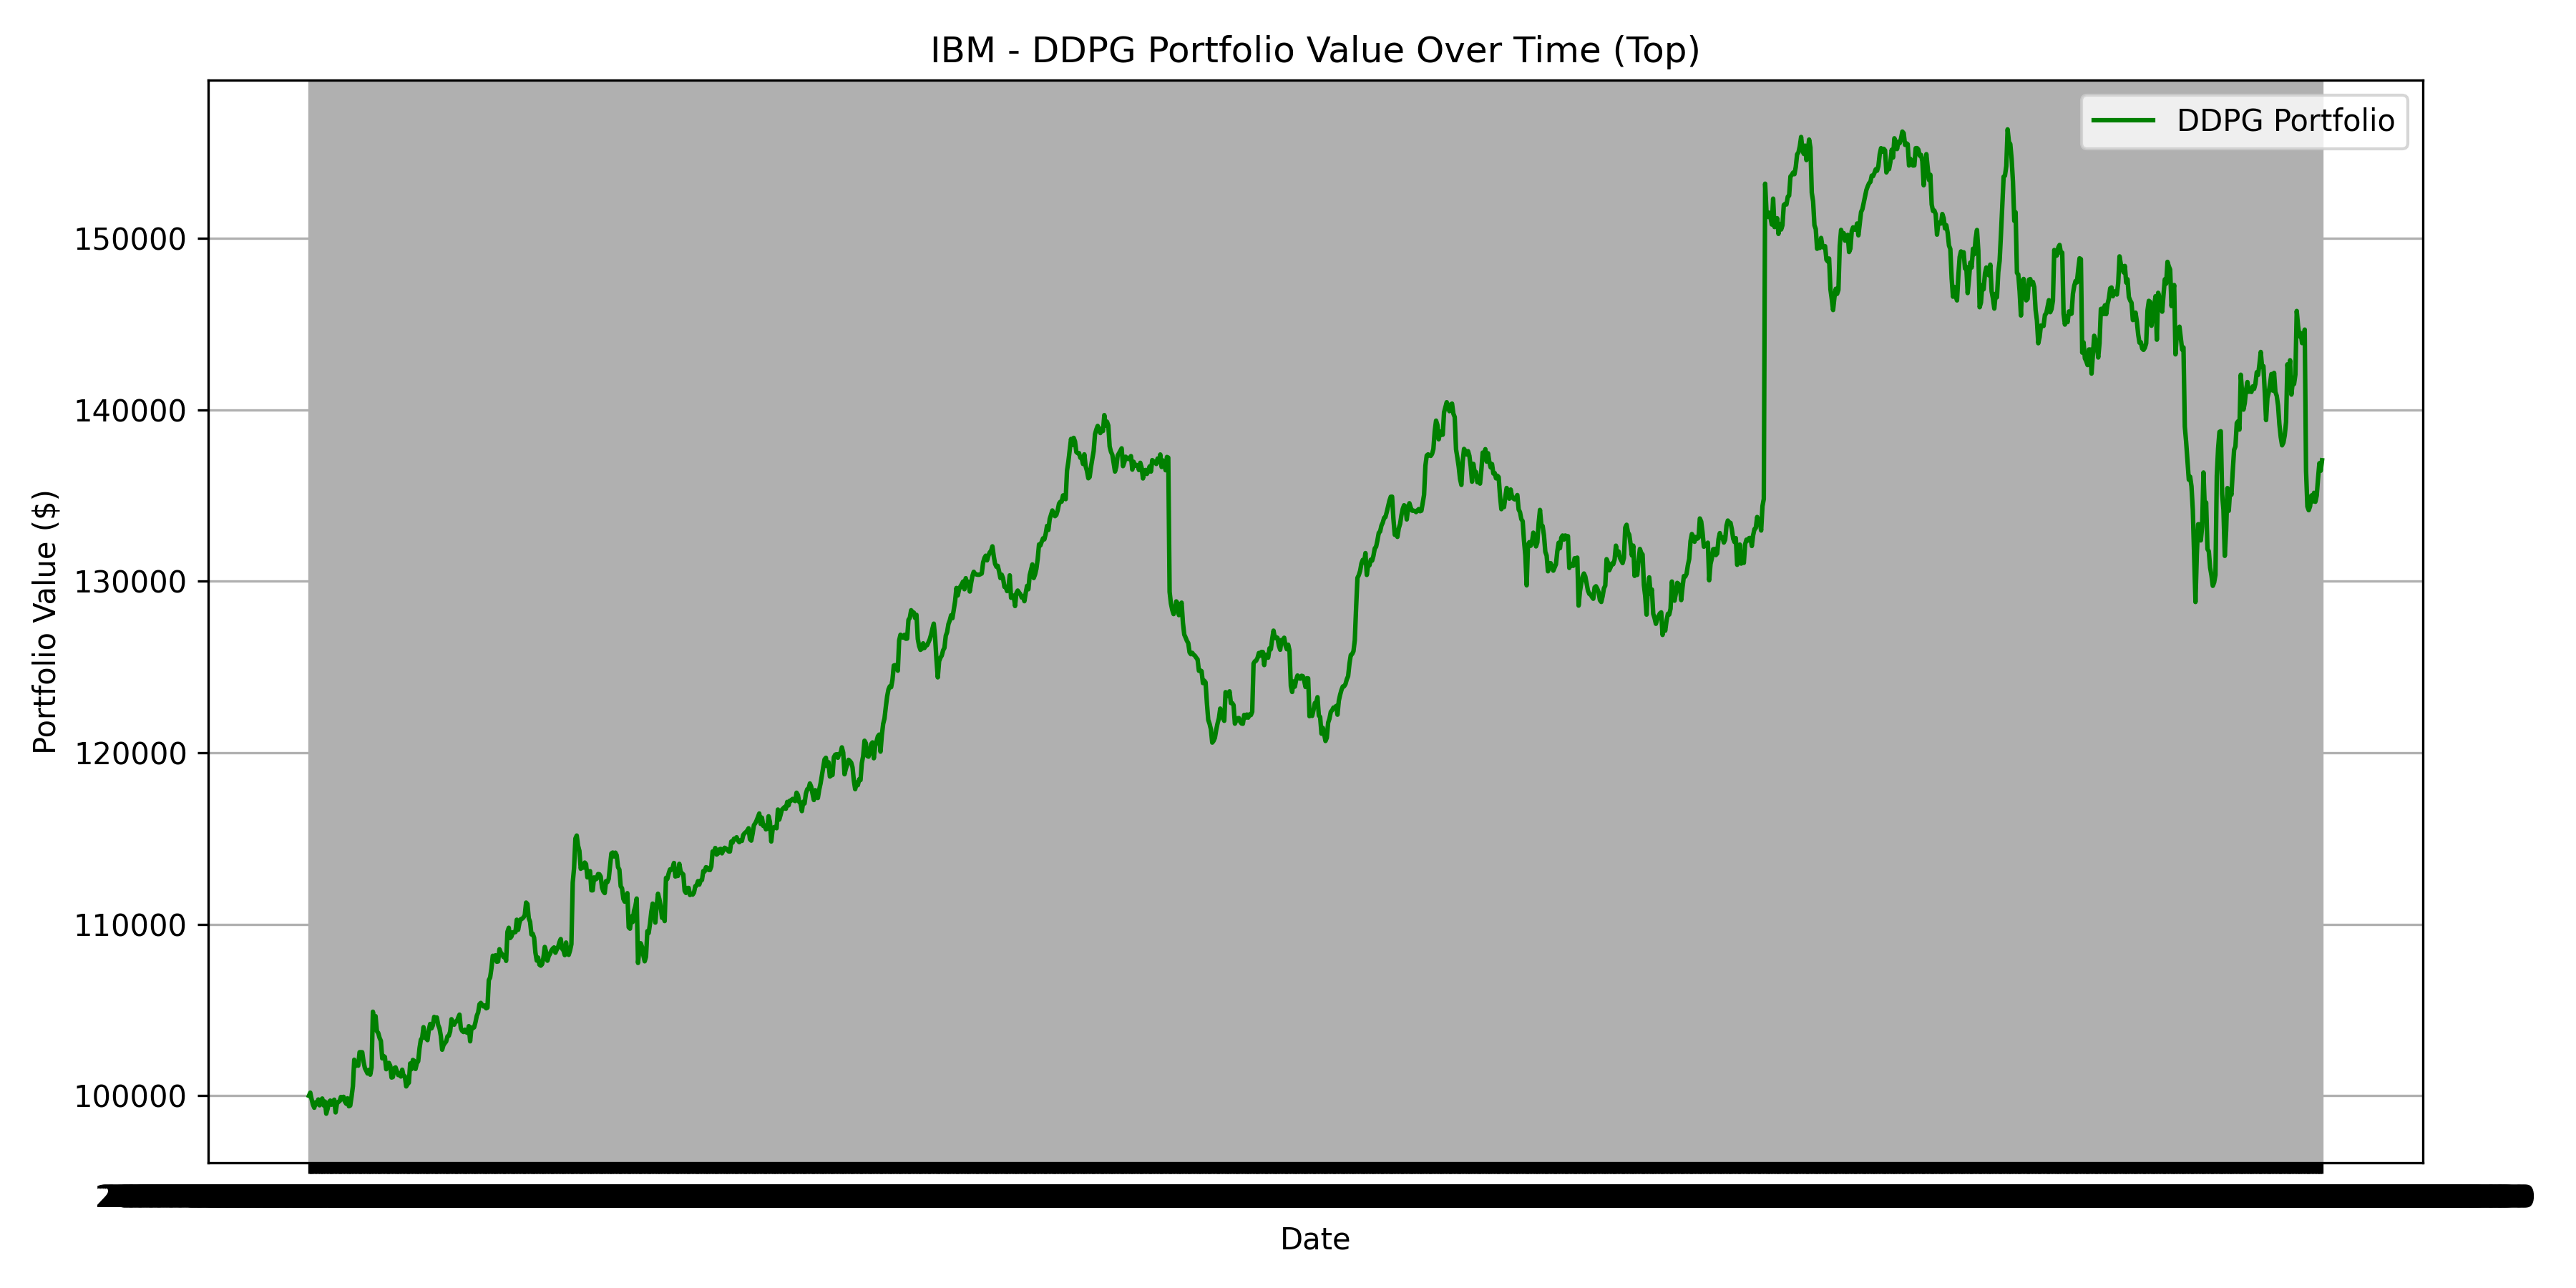

✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/BRK-B_ddpg_portfolio_top.png


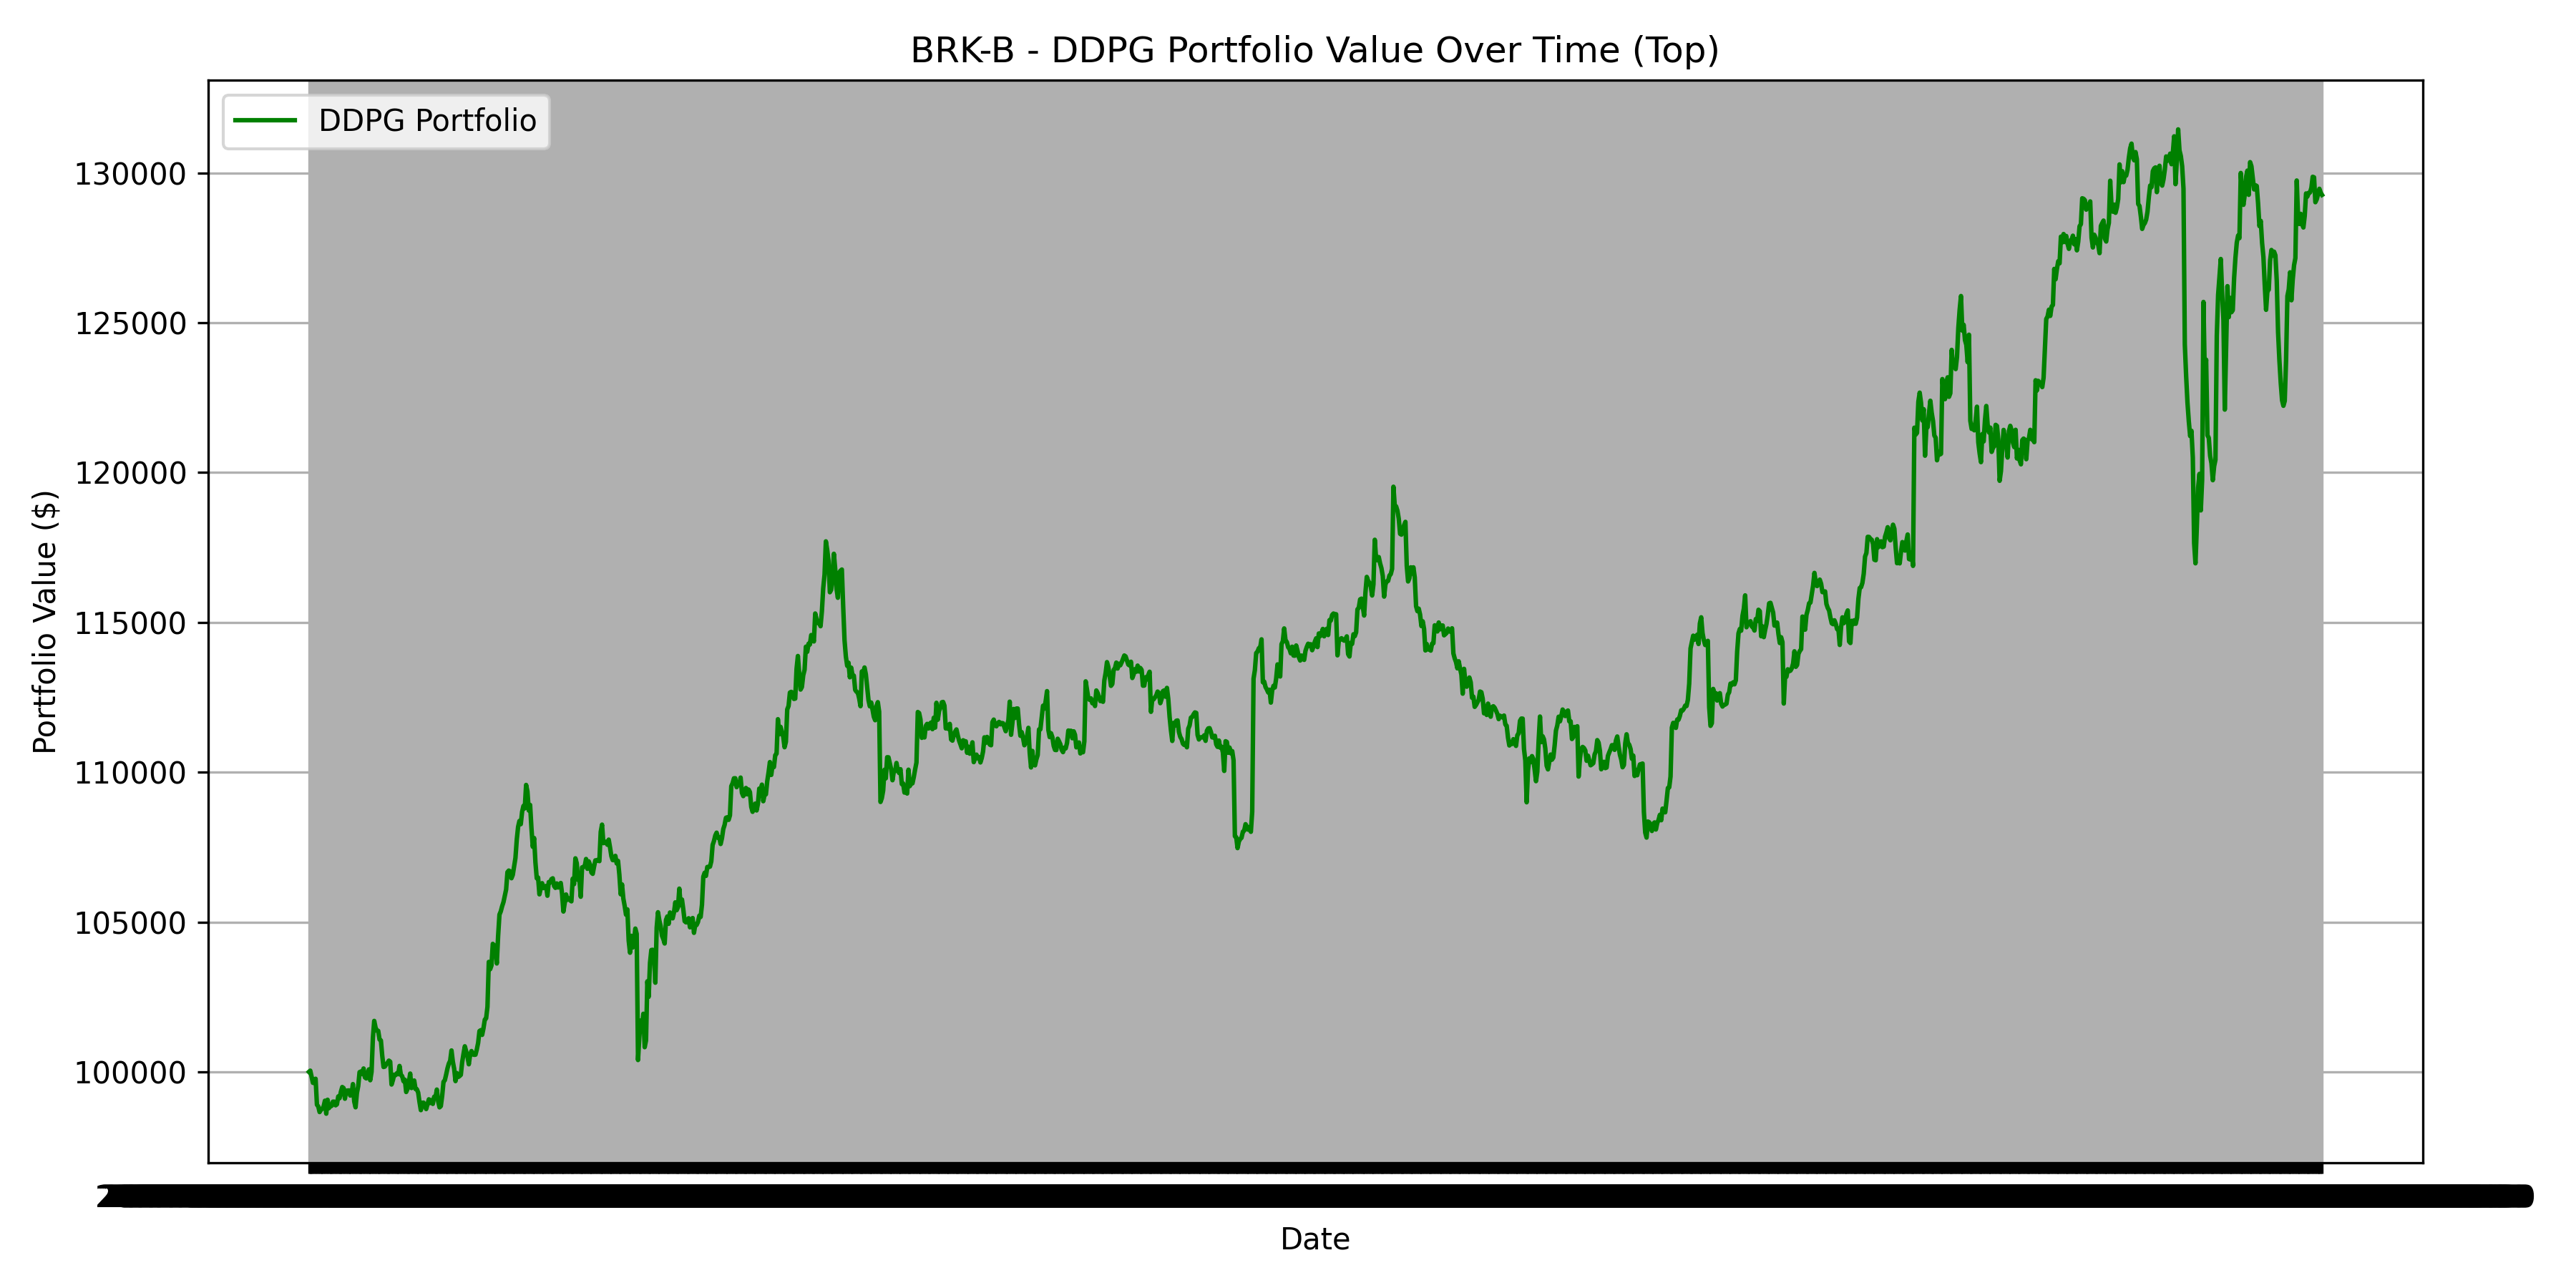

✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/JPM_ddpg_portfolio_top.png


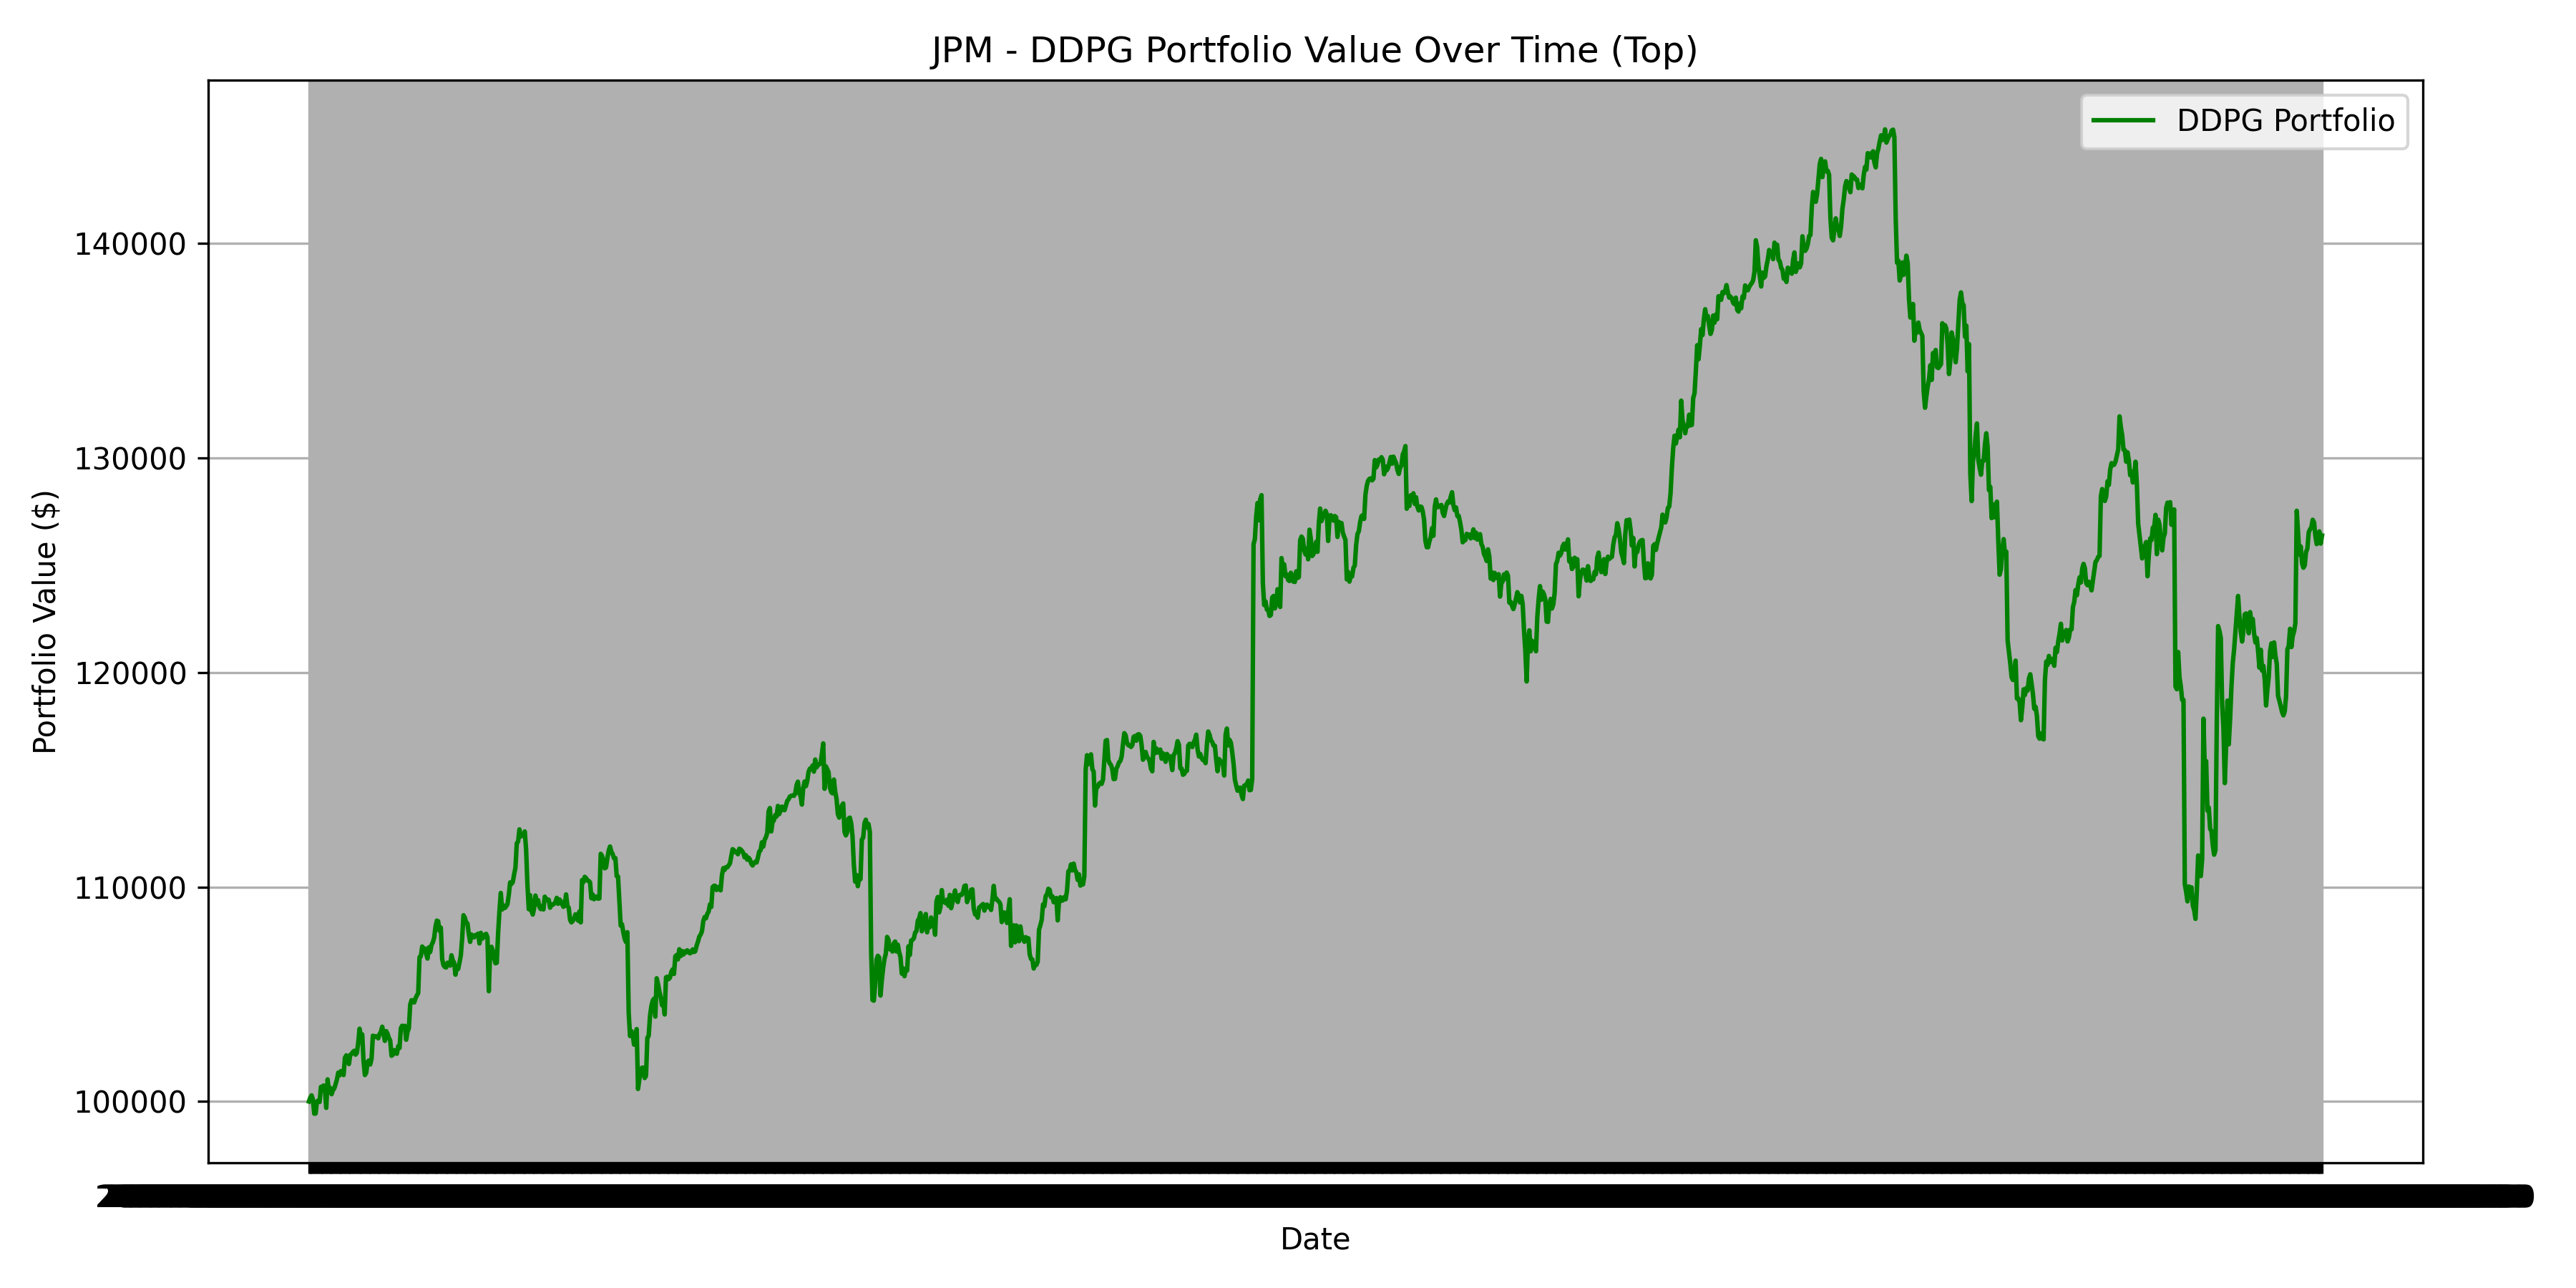

✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/CSCO_ddpg_portfolio_top.png


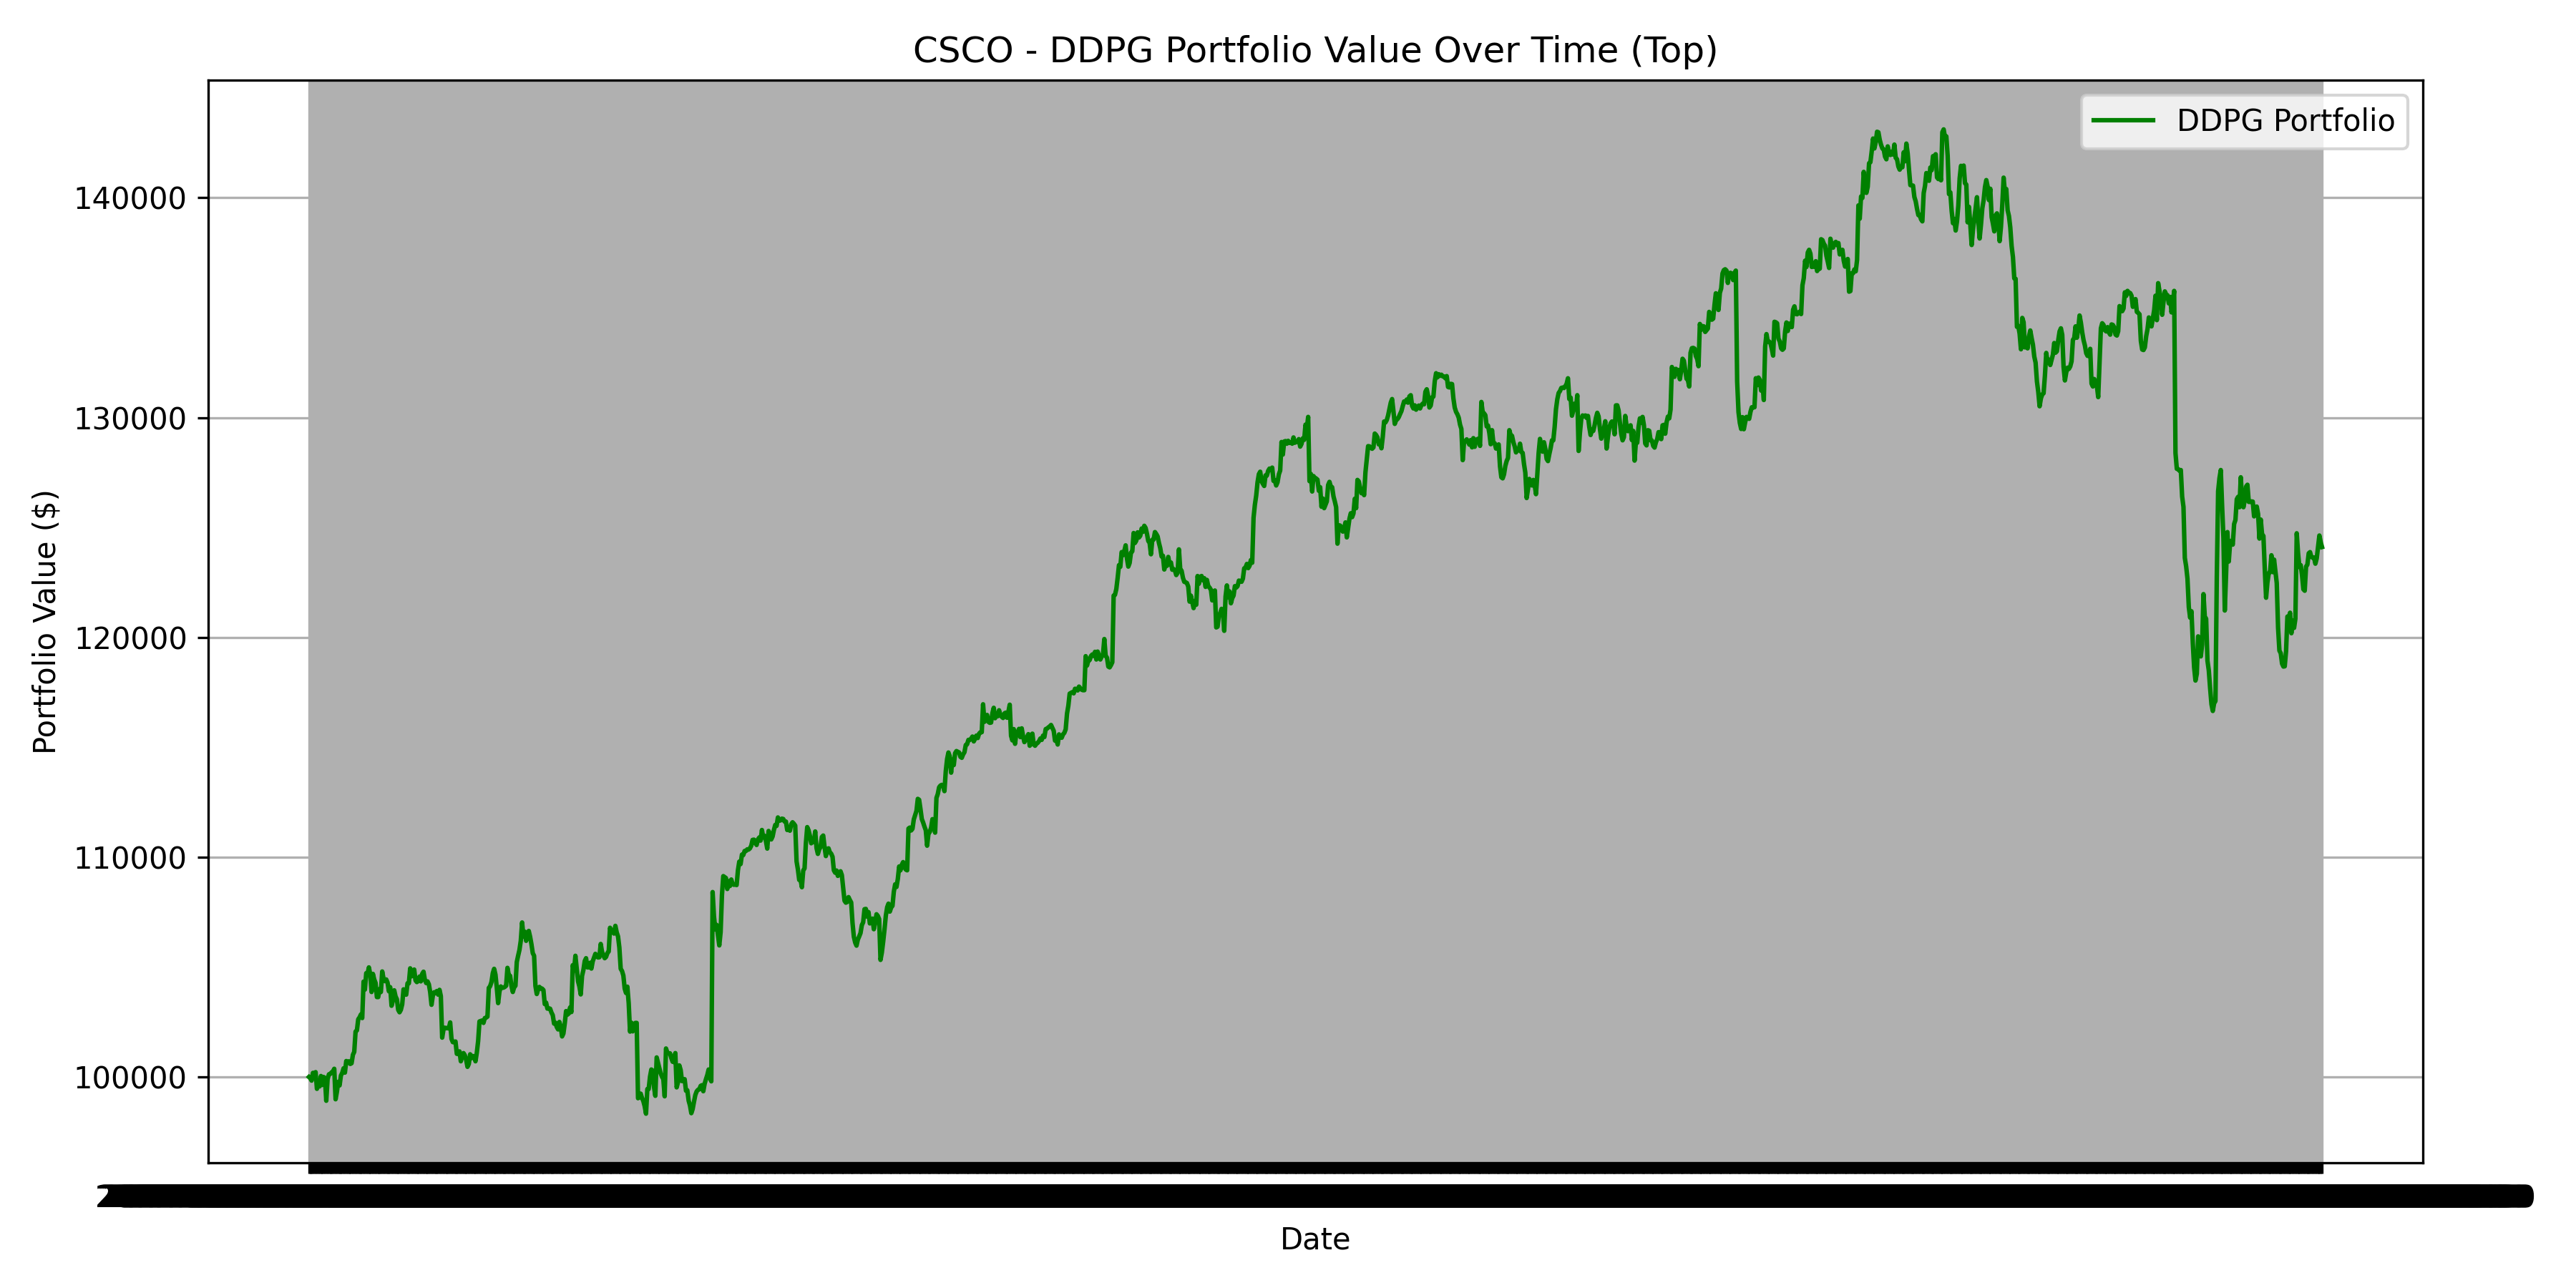

✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/ABT_ddpg_portfolio_top.png


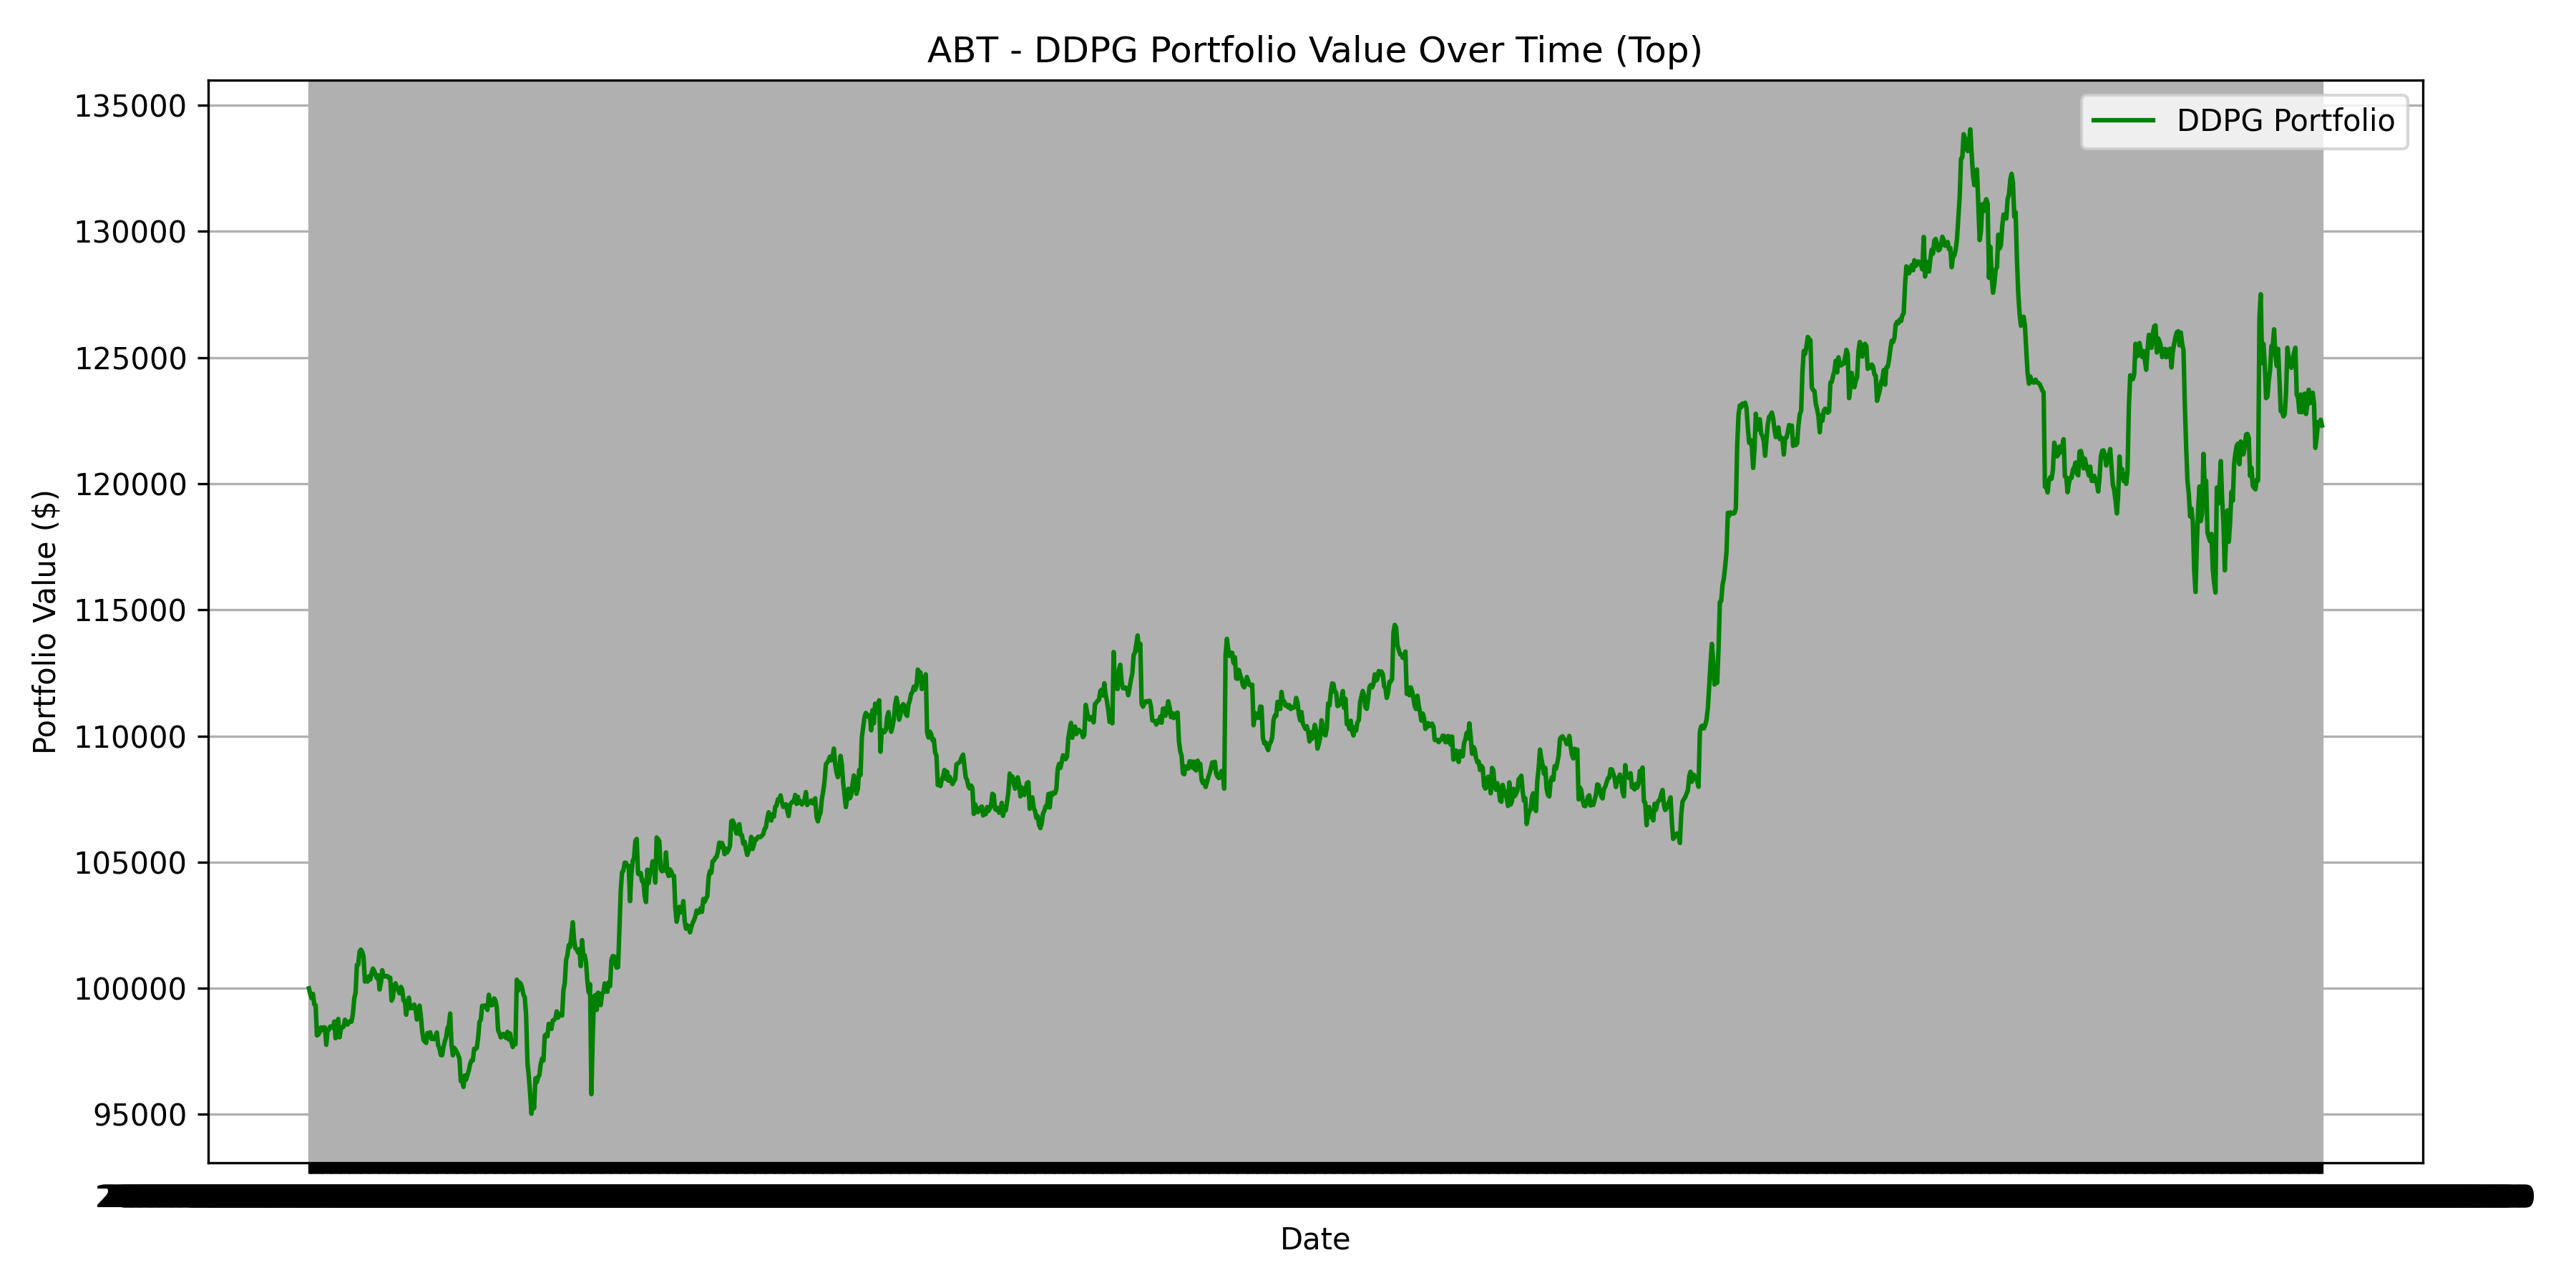


📈 Bottom 5 Tickers:
✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/AMD_ddpg_portfolio_bottom.png


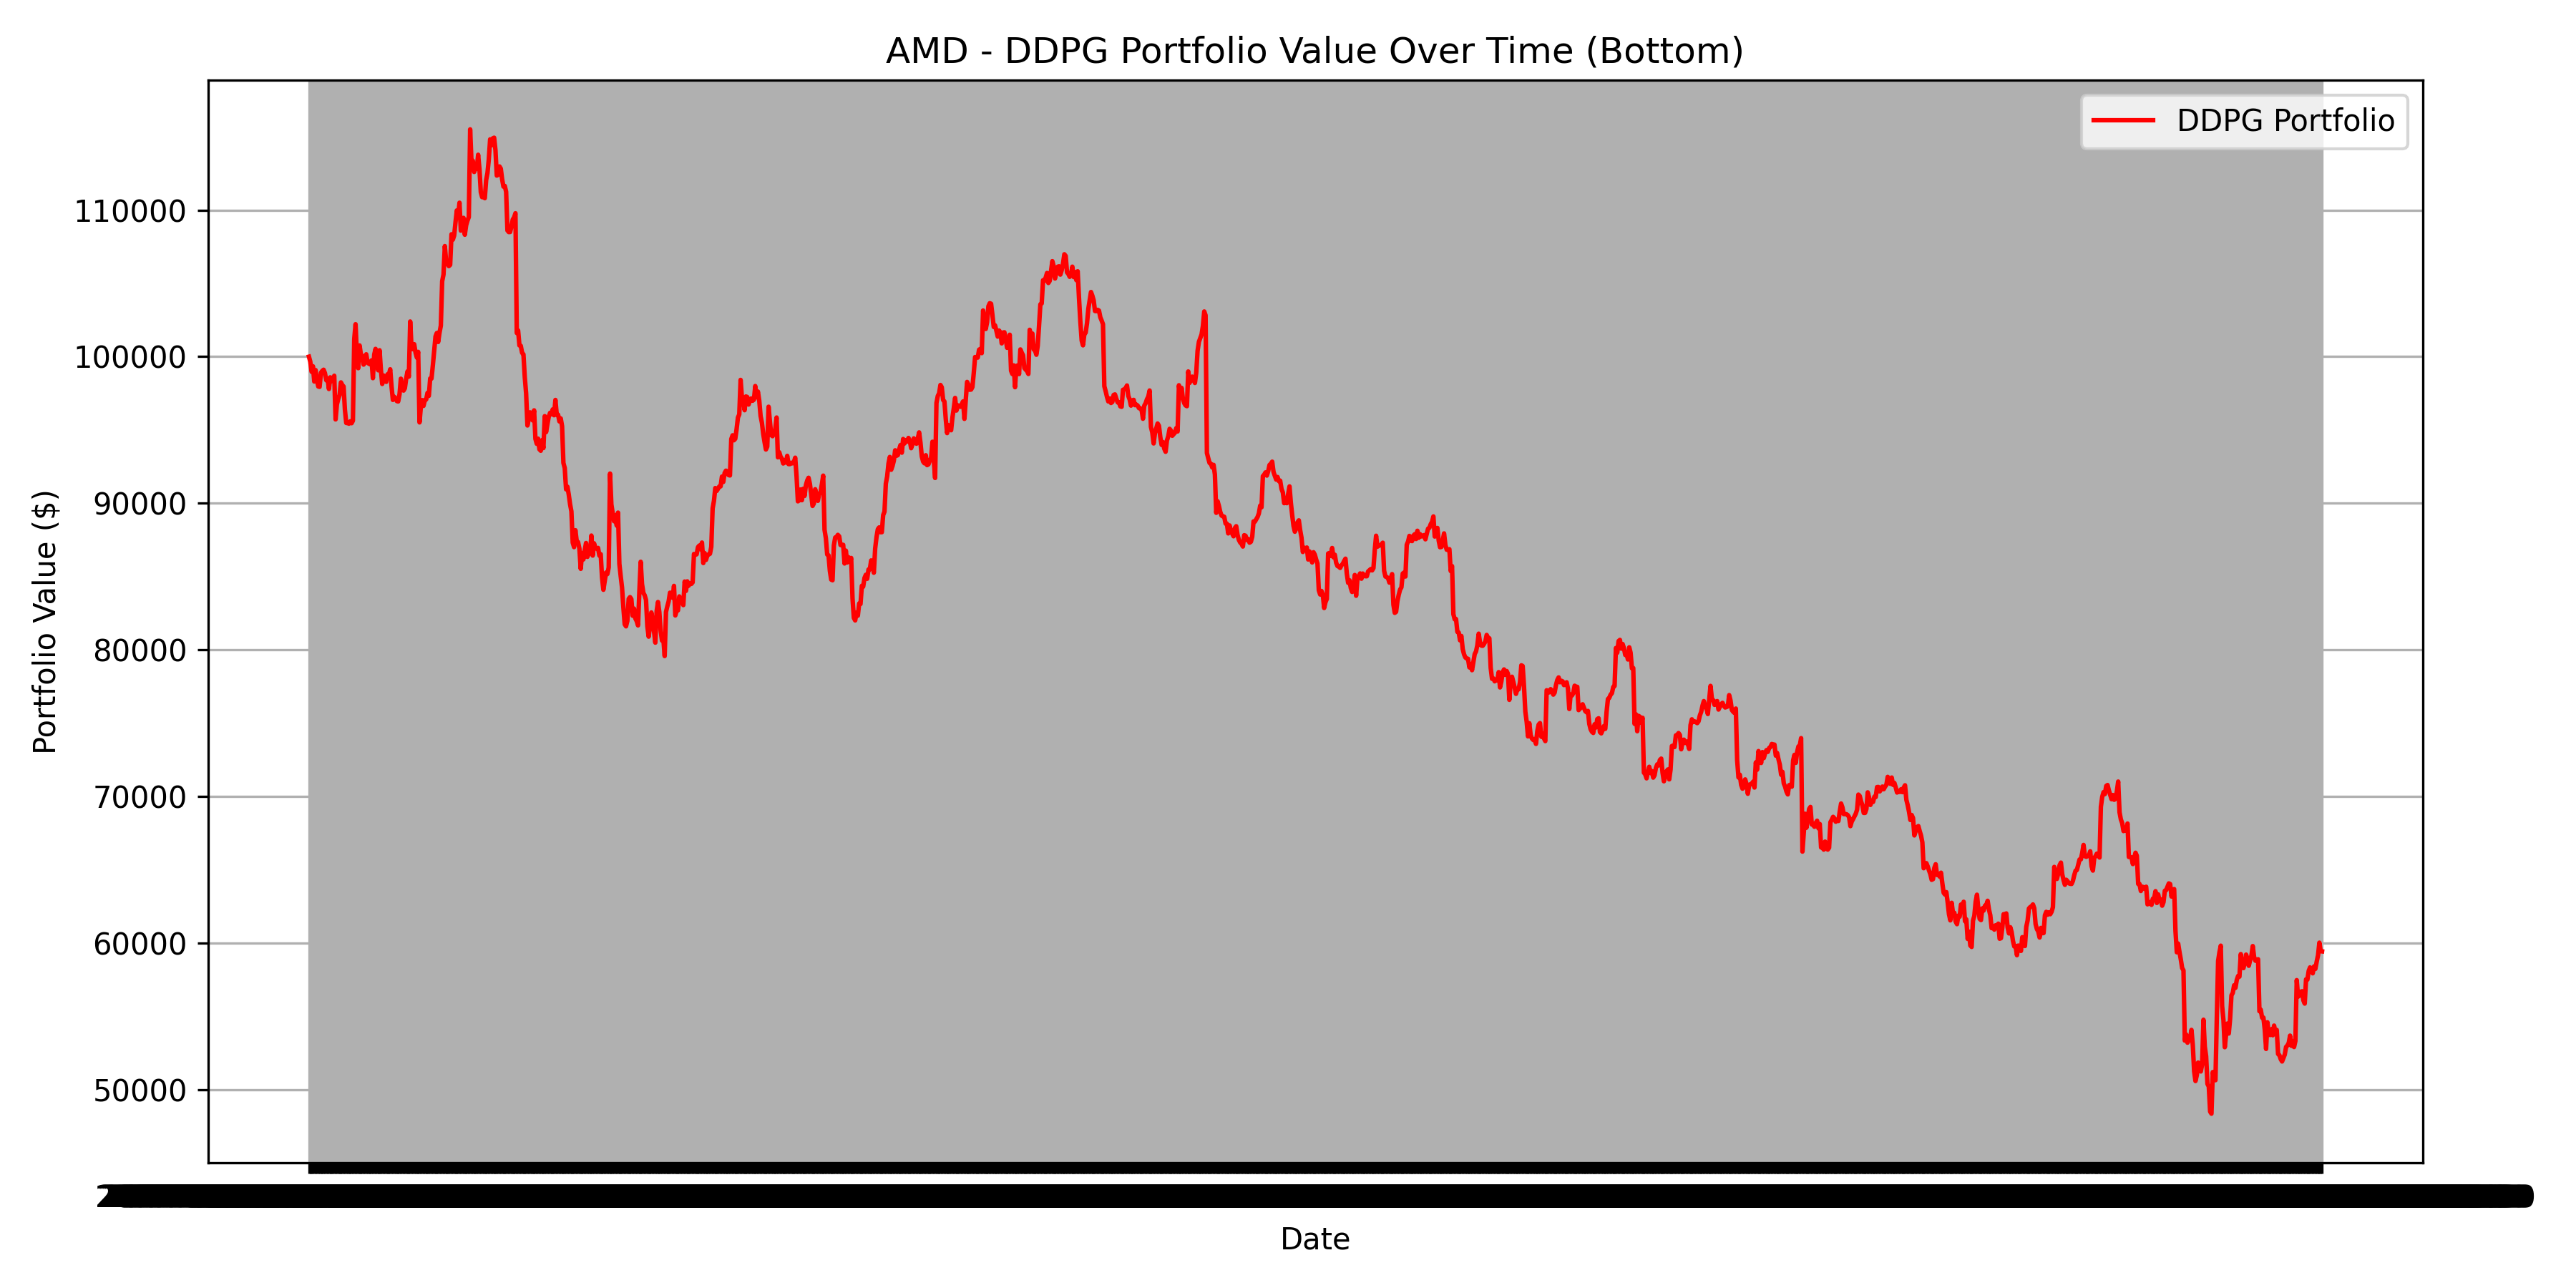

✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/NKE_ddpg_portfolio_bottom.png


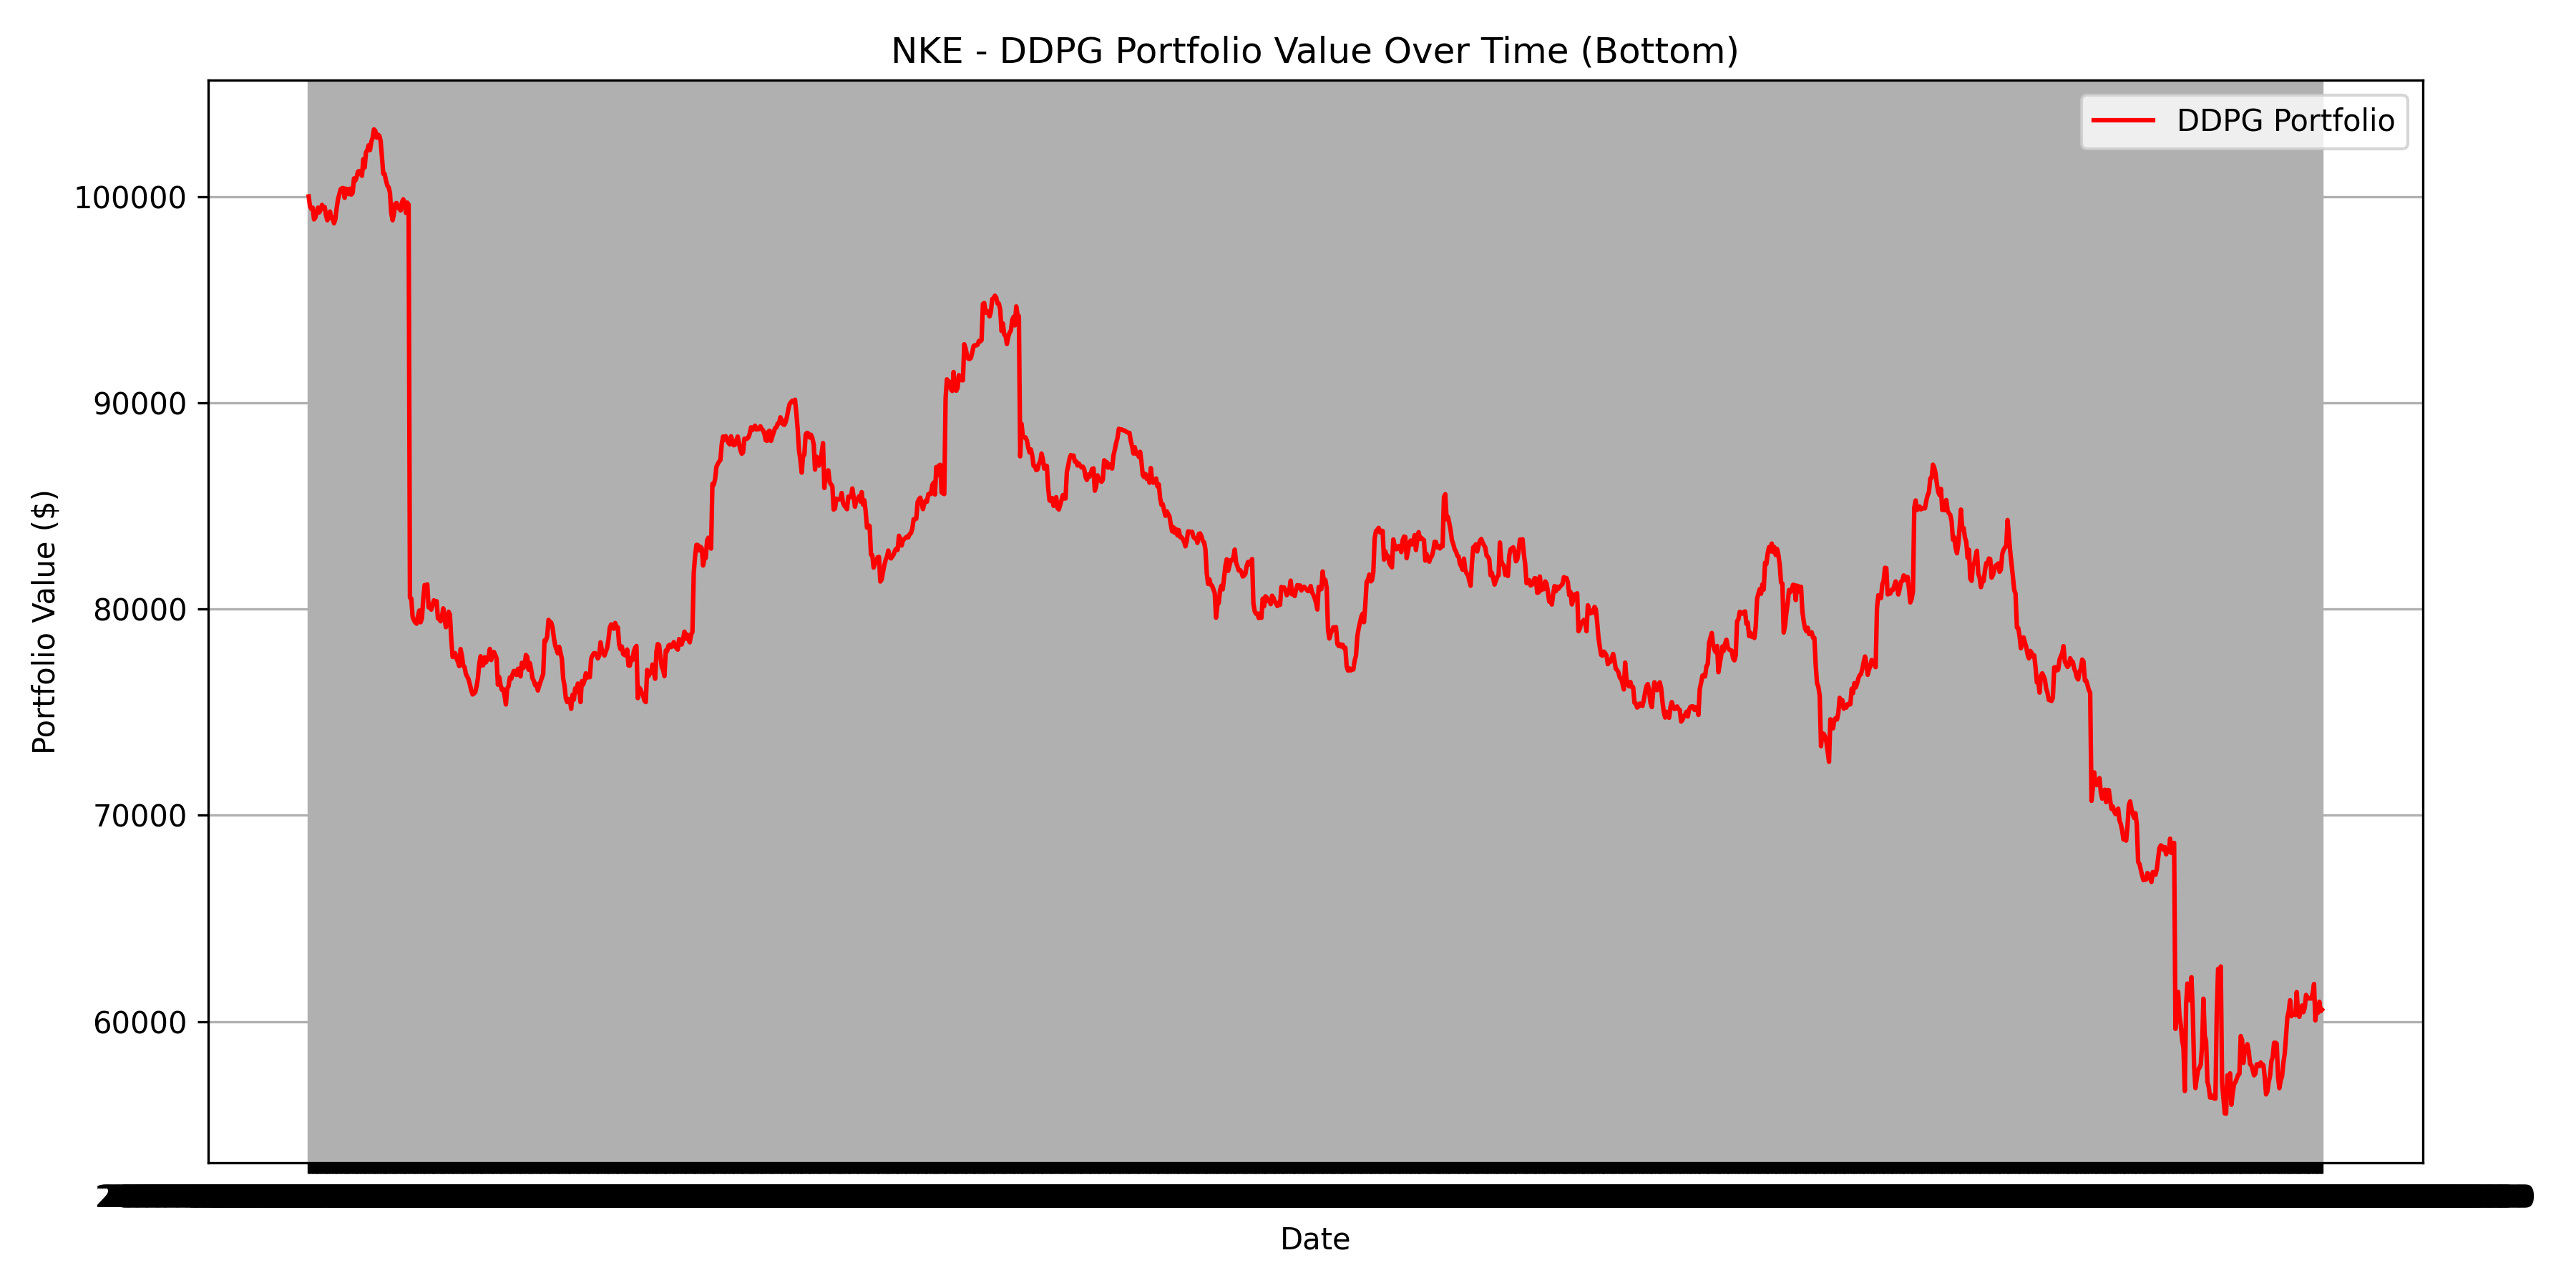

✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/MRK_ddpg_portfolio_bottom.png


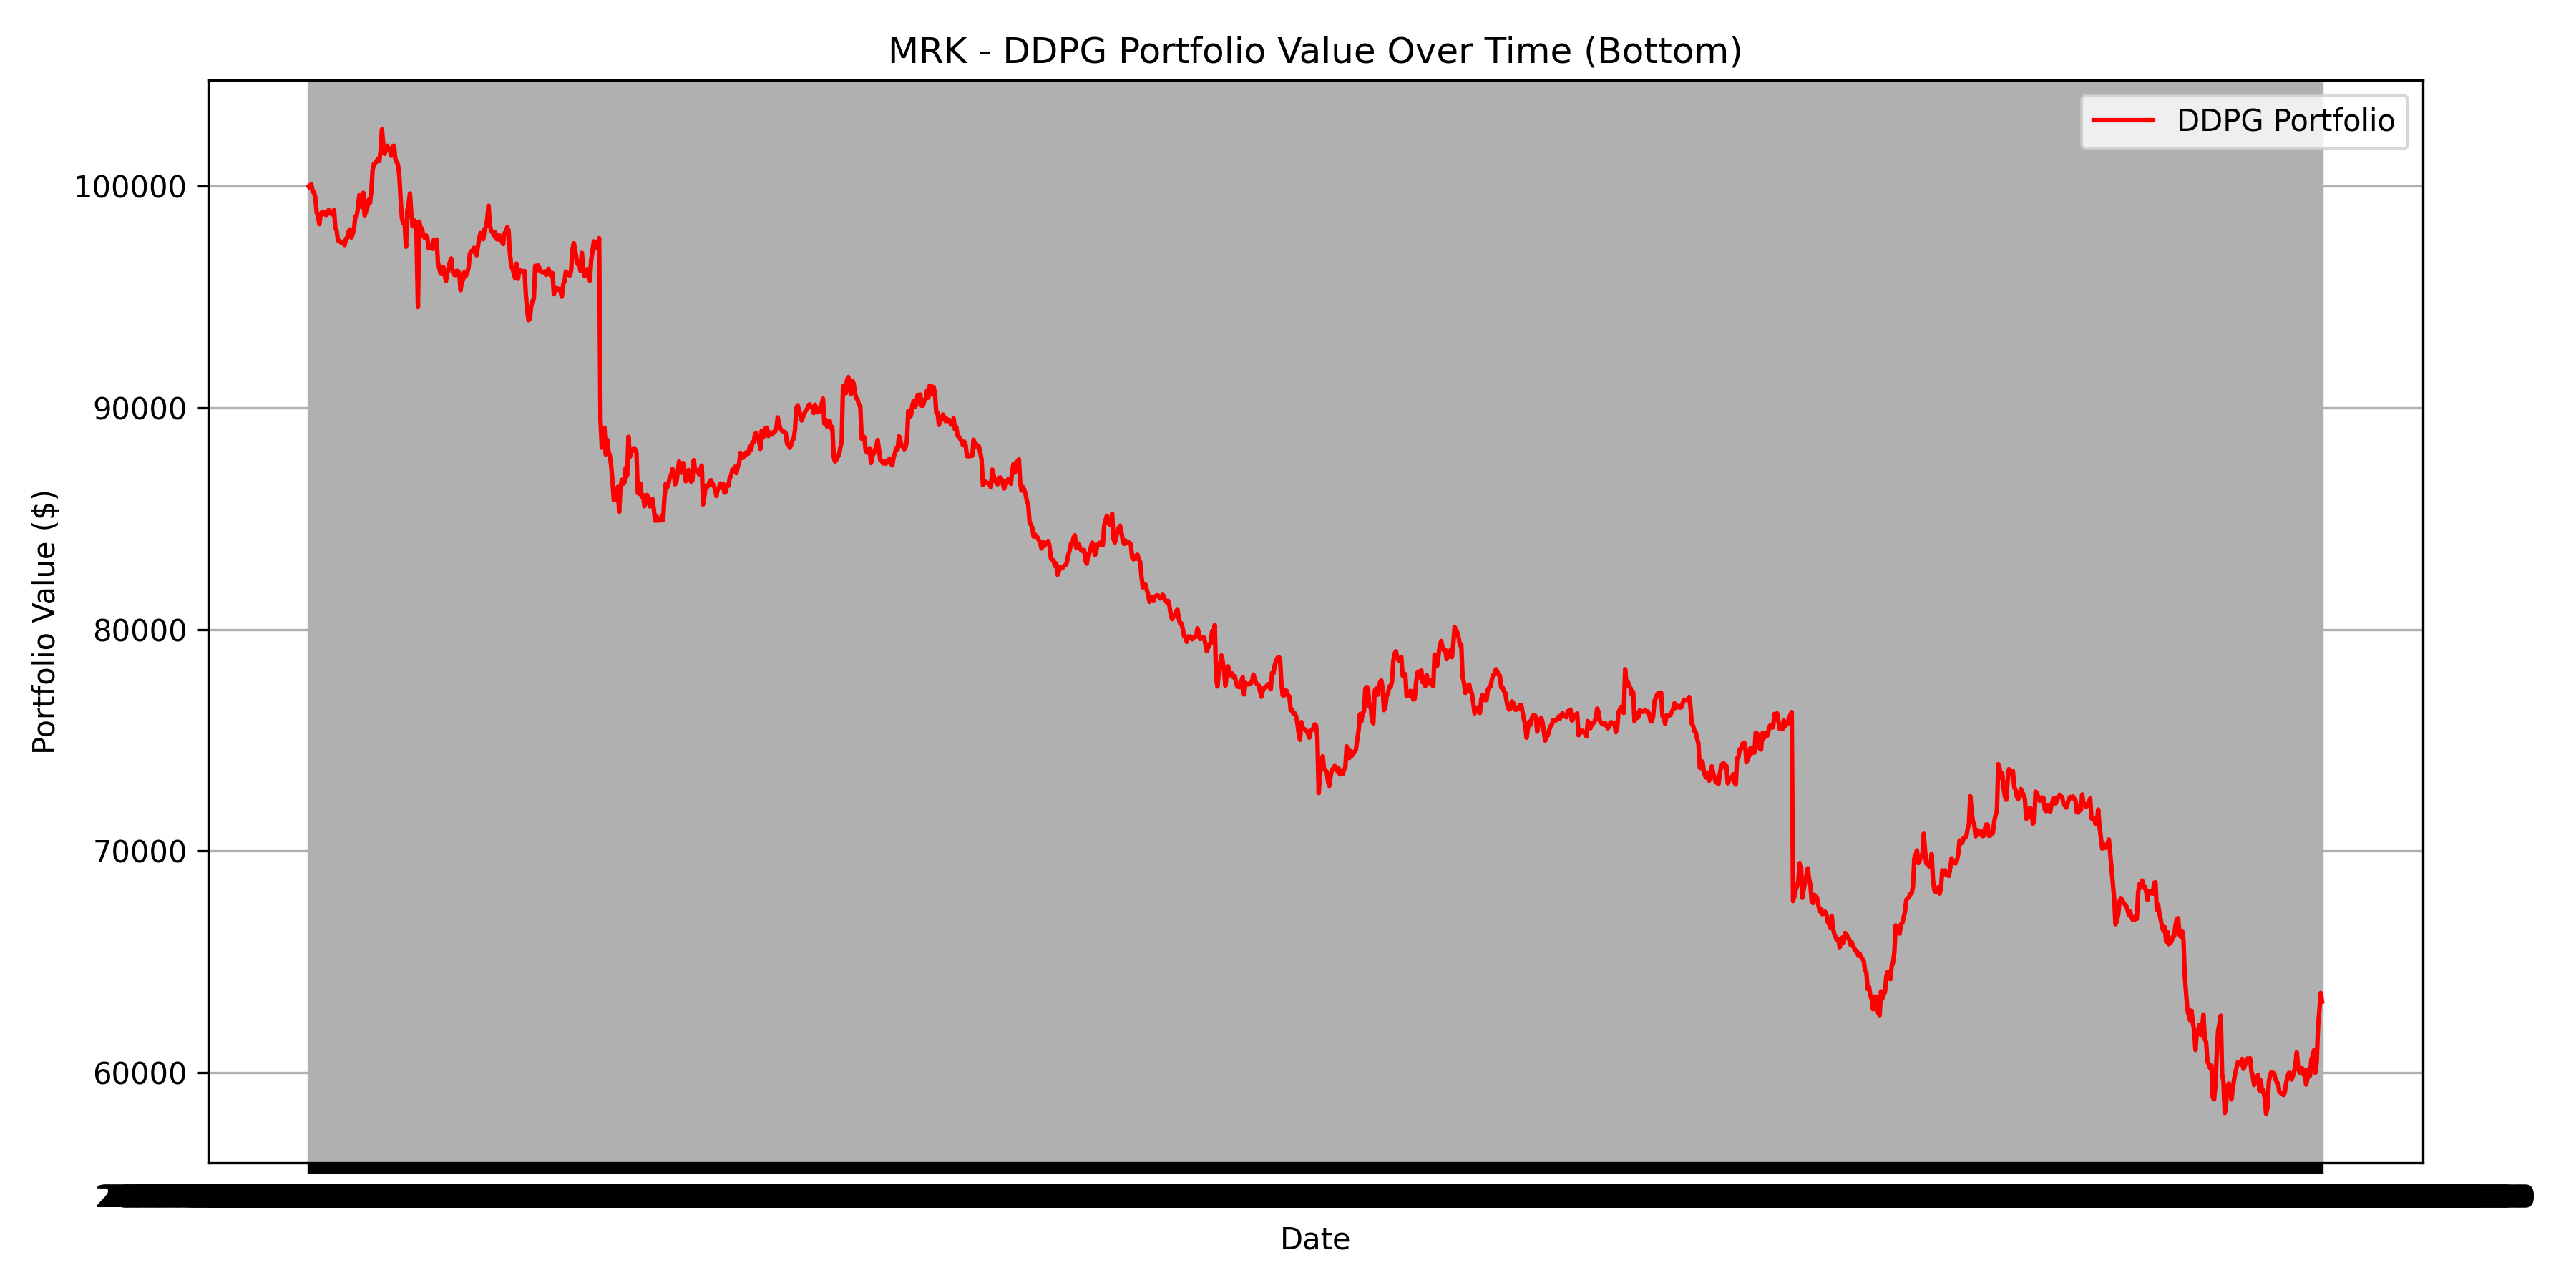

✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/UPS_ddpg_portfolio_bottom.png


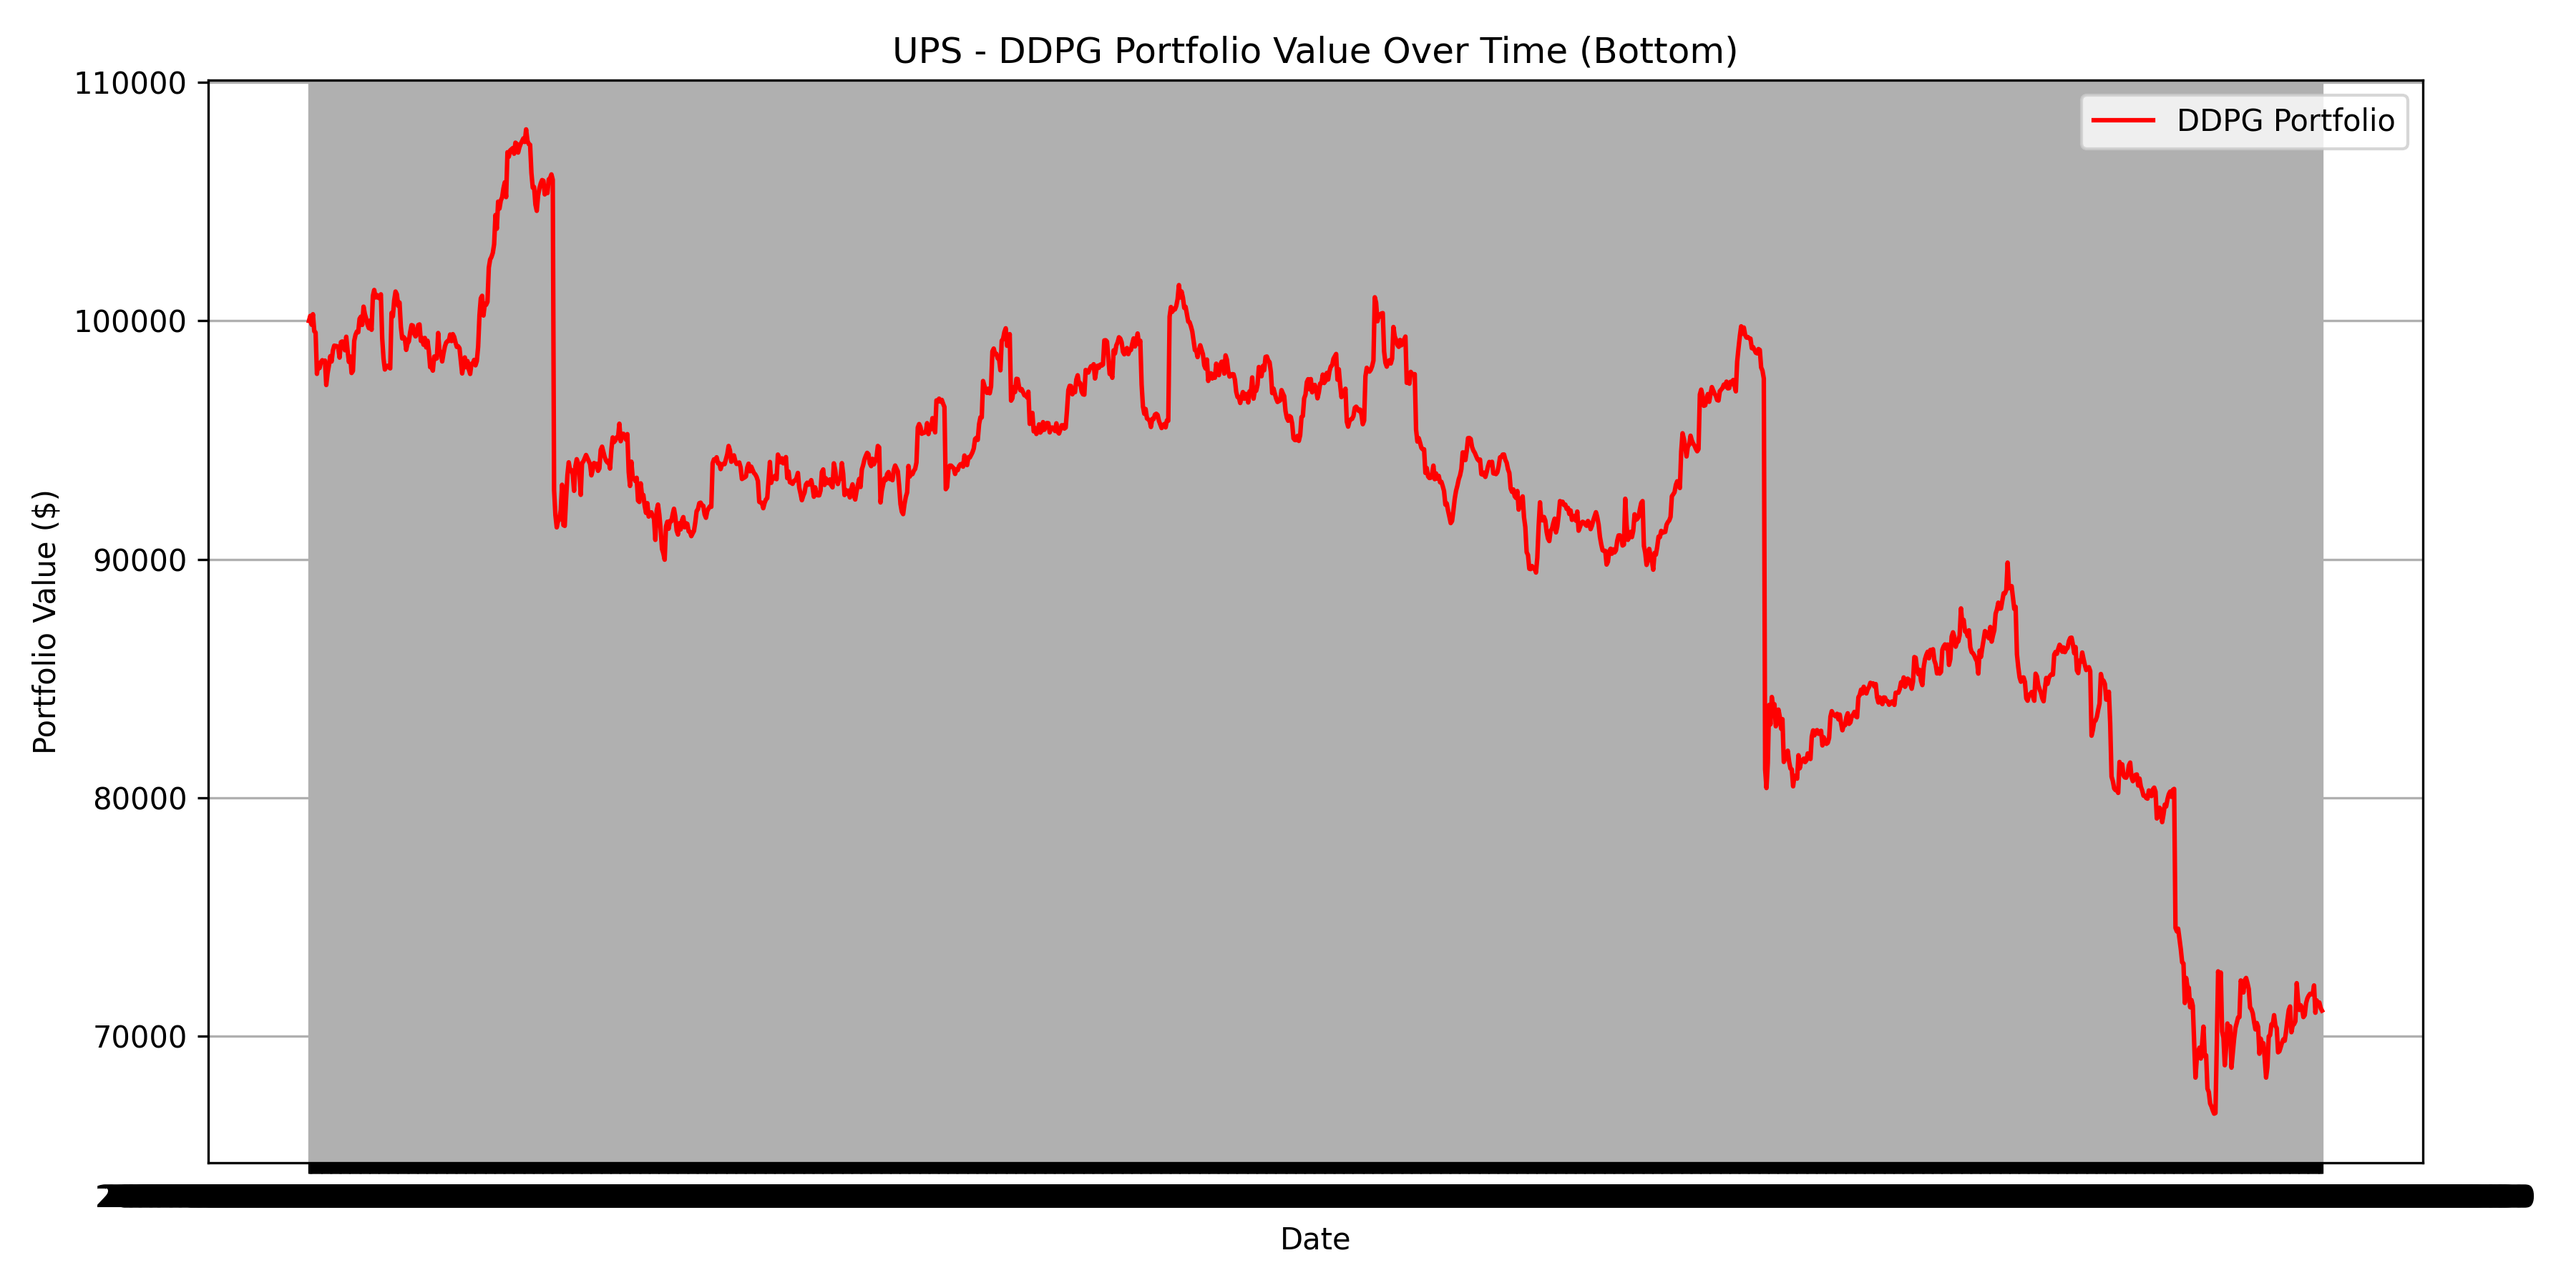

✅ Saved plot: /content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward/plots/DHR_ddpg_portfolio_bottom.png


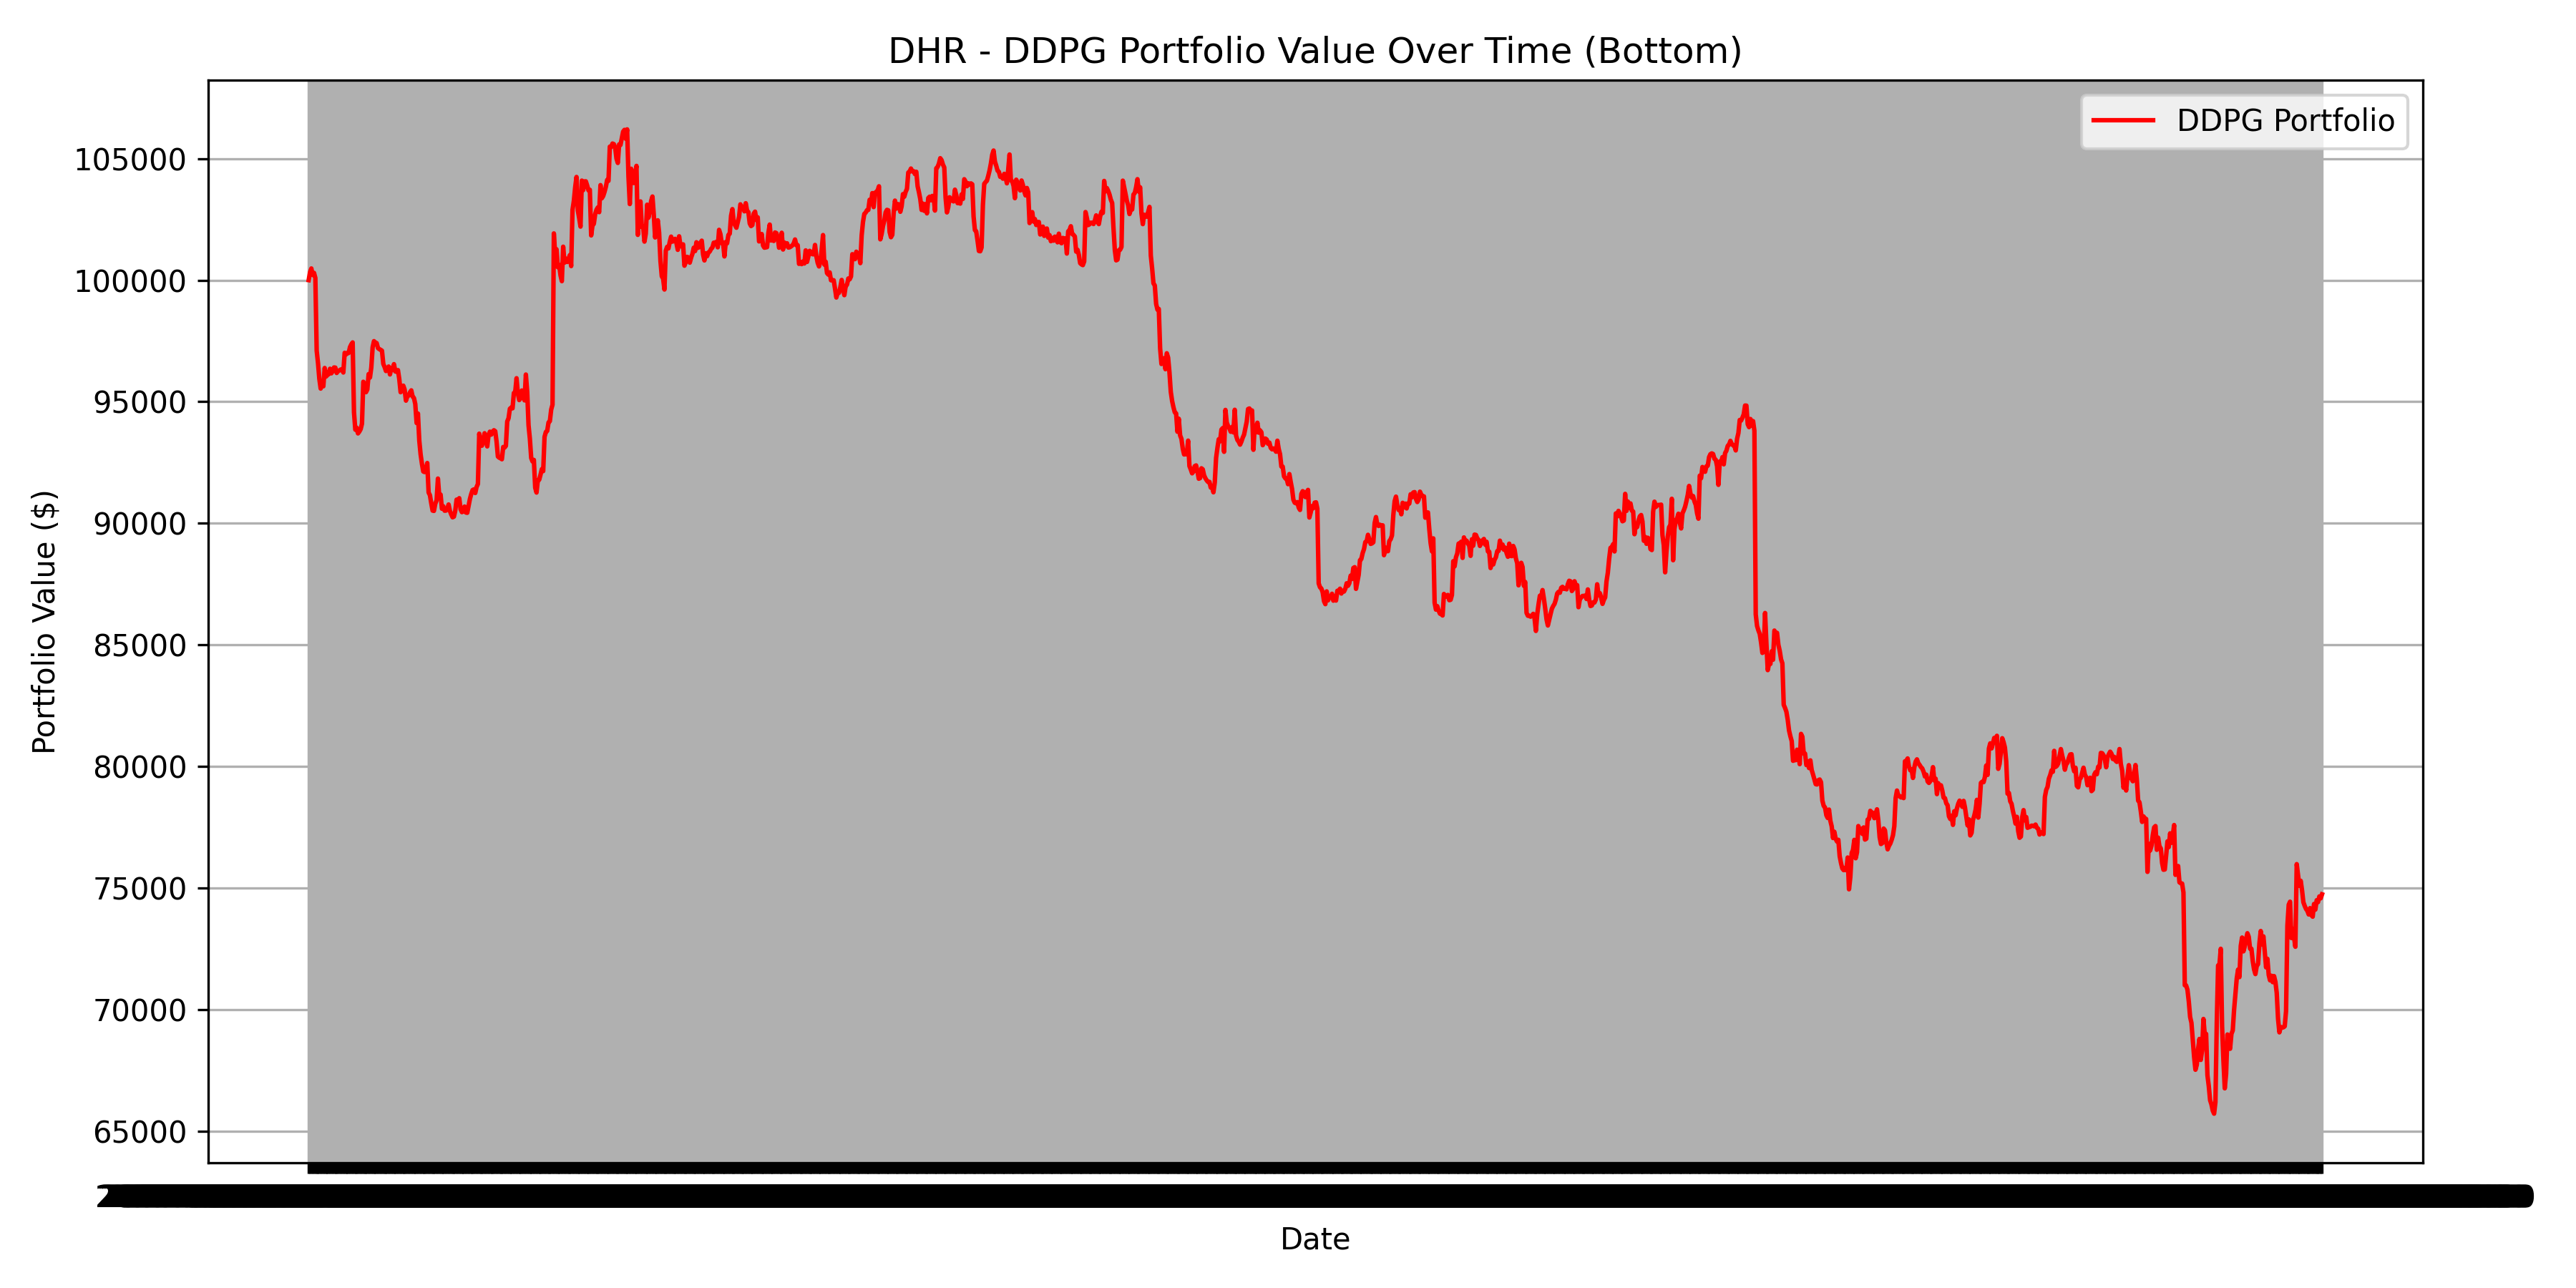

In [10]:
# === Imports ===
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

# === Configuration ===
RESULTS_DIR = "/content/drive/MyDrive/Results_May_2025/results_ddpg_walkforward"
SUMMARY_FILE = "ddpg_datebased_walkforward_summary.csv"
MODEL_NAME = "DDPG"
OUTPUT_SELECTOR = "model_selector_ready_ddpg.csv"

# === Paths ===
summary_path = os.path.join(RESULTS_DIR, SUMMARY_FILE)
plot_dir = os.path.join(RESULTS_DIR, "plots")
data_dir = os.path.join(RESULTS_DIR, "data")
os.makedirs(plot_dir, exist_ok=True)

# === Load Summary ===
summary_df = pd.read_csv(summary_path)

# === Save Model Selector CSV ===
summary_df["Model"] = MODEL_NAME
if "Accuracy" not in summary_df.columns:
    summary_df["Accuracy"] = pd.NA  # just in case

selector_df = summary_df[[
    "Ticker", "Model", "Sharpe", "Accuracy", "Drawdown", "Return", "Final_Portfolio"
]]
selector_path = os.path.join(RESULTS_DIR, OUTPUT_SELECTOR)
selector_df.to_csv(selector_path, index=False)
print(f"✅ Saved model selector file to: {selector_path}")

# === Get Top and Bottom 5 Tickers ===
top_tickers = summary_df.sort_values("Final_Portfolio", ascending=False).head(5)["Ticker"]
bottom_tickers = summary_df.sort_values("Final_Portfolio", ascending=True).head(5)["Ticker"]

# === Plotting Function ===
def plot_portfolios(tickers, label):
    print(f"\n📈 {label} 5 Tickers:")
    for ticker in tickers:
        file_path = os.path.join(data_dir, f"{ticker}_portfolio.csv")
        plot_path = os.path.join(plot_dir, f"{ticker}_ddpg_portfolio_{label.lower()}.png")

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            plt.figure(figsize=(12, 6))
            plt.plot(df["Date"], df["Portfolio Value"], label="DDPG Portfolio", color="green" if label == "Top" else "red")
            plt.title(f"{ticker} - DDPG Portfolio Value Over Time ({label})")
            plt.xlabel("Date")
            plt.ylabel("Portfolio Value ($)")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.savefig(plot_path, dpi=300)
            plt.close()
            print(f"✅ Saved plot: {plot_path}")
            display(Image(filename=plot_path))
        else:
            print(f"⚠️ Missing portfolio file: {file_path}")

# === Run Visualizations ===
plot_portfolios(top_tickers, label="Top")
plot_portfolios(bottom_tickers, label="Bottom")
